In [1]:
# import essential libraries
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read in data.csv
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(170653, 19)


valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [6]:
# set up size and color for sns
sns.set(rc={'figure.figsize':(15,4)})
plt.rcParams['figure.dpi'] = 300
plt.style.use('fivethirtyeight')

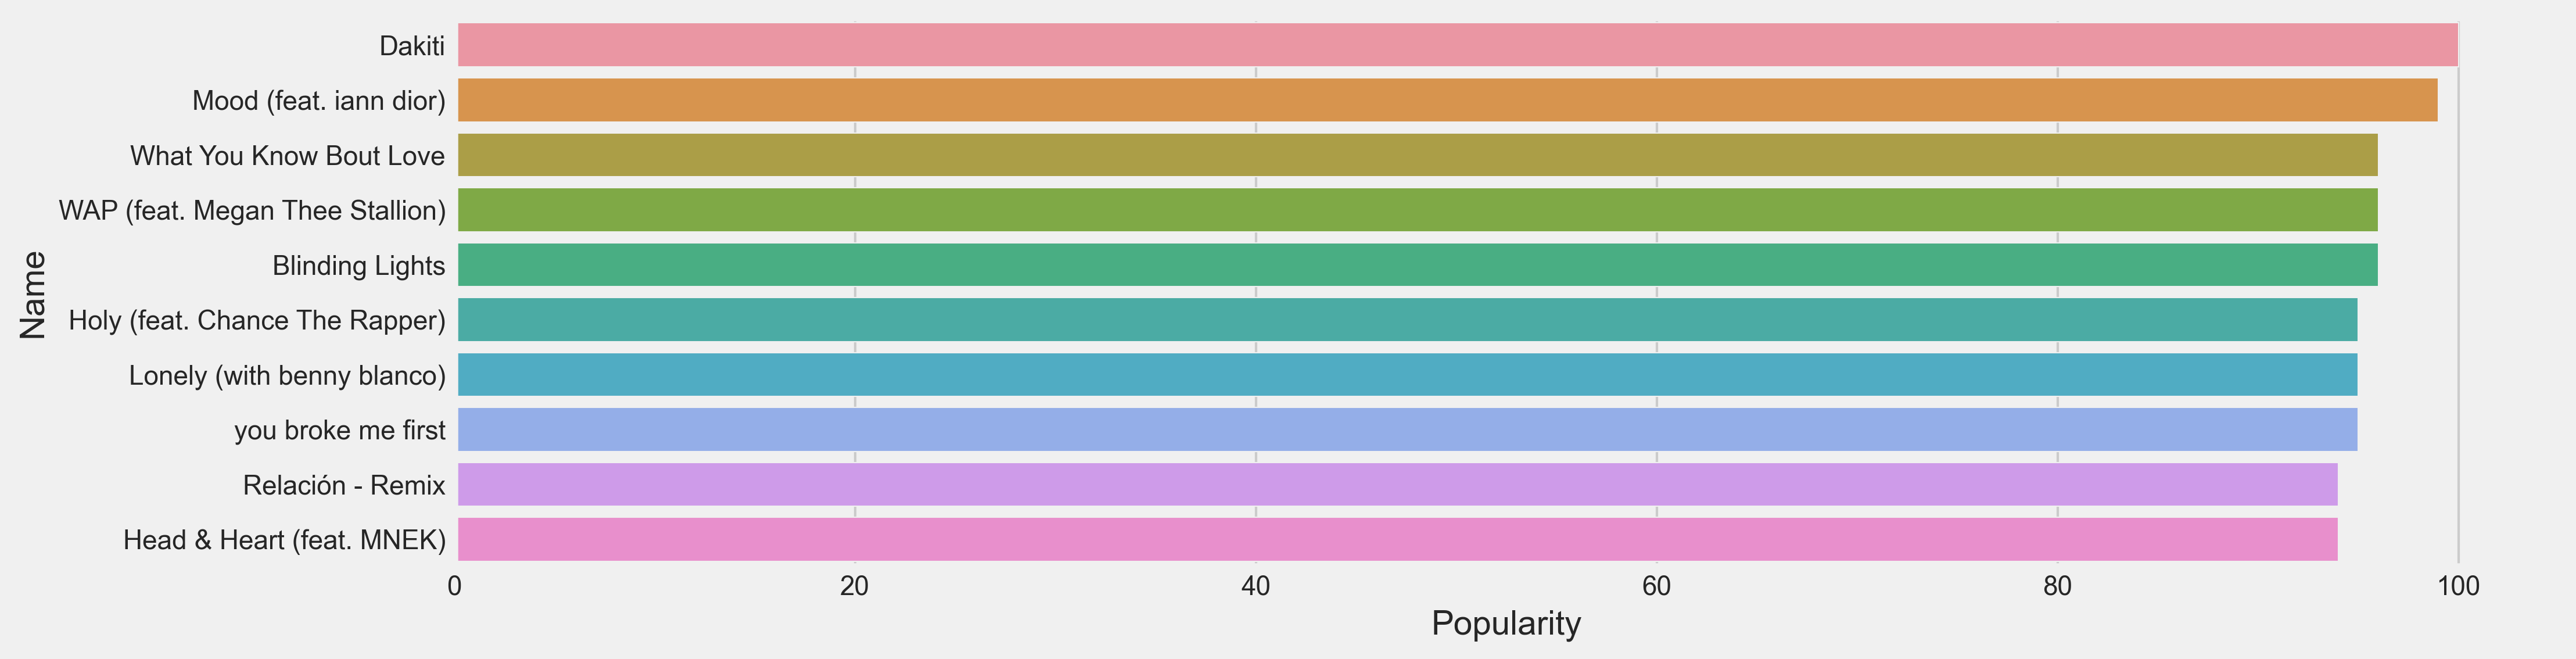

In [7]:
# top 10 popular songs in the dataset
songs = df.groupby('name')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=songs, y=songs.index, orient = 'h')
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.tight_layout()

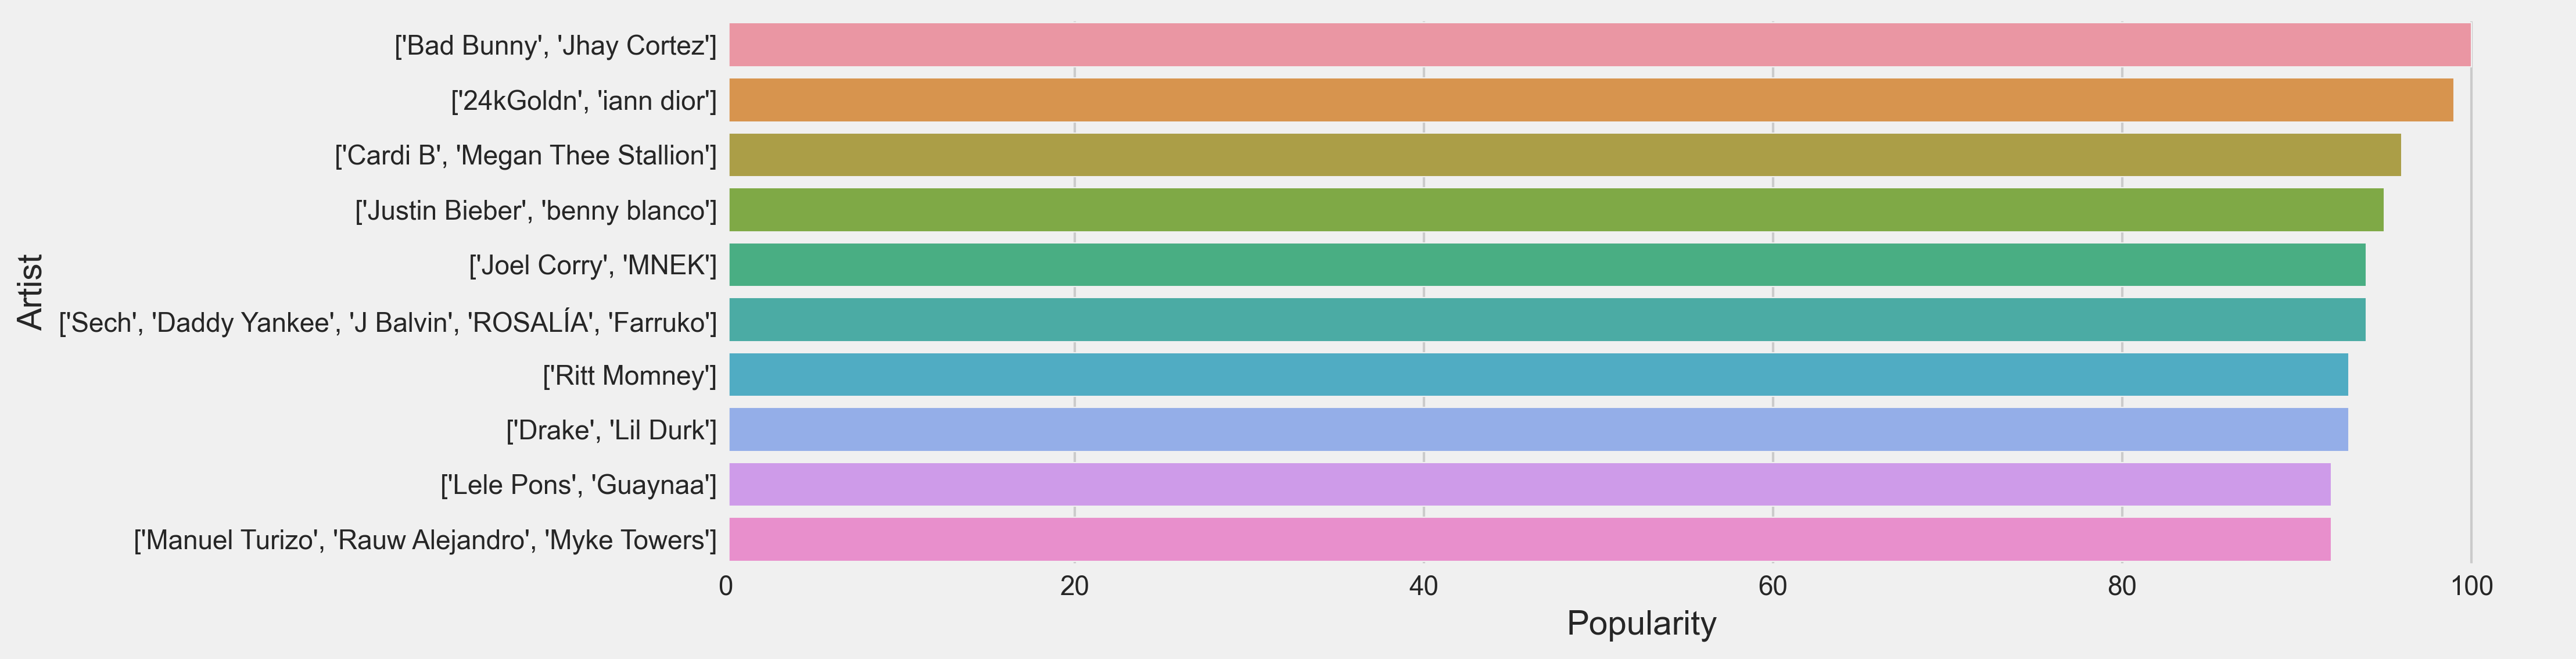

In [8]:
# top 10 popular songs in the dataset
artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=artists, y=artists.index, orient = 'h')
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.tight_layout()

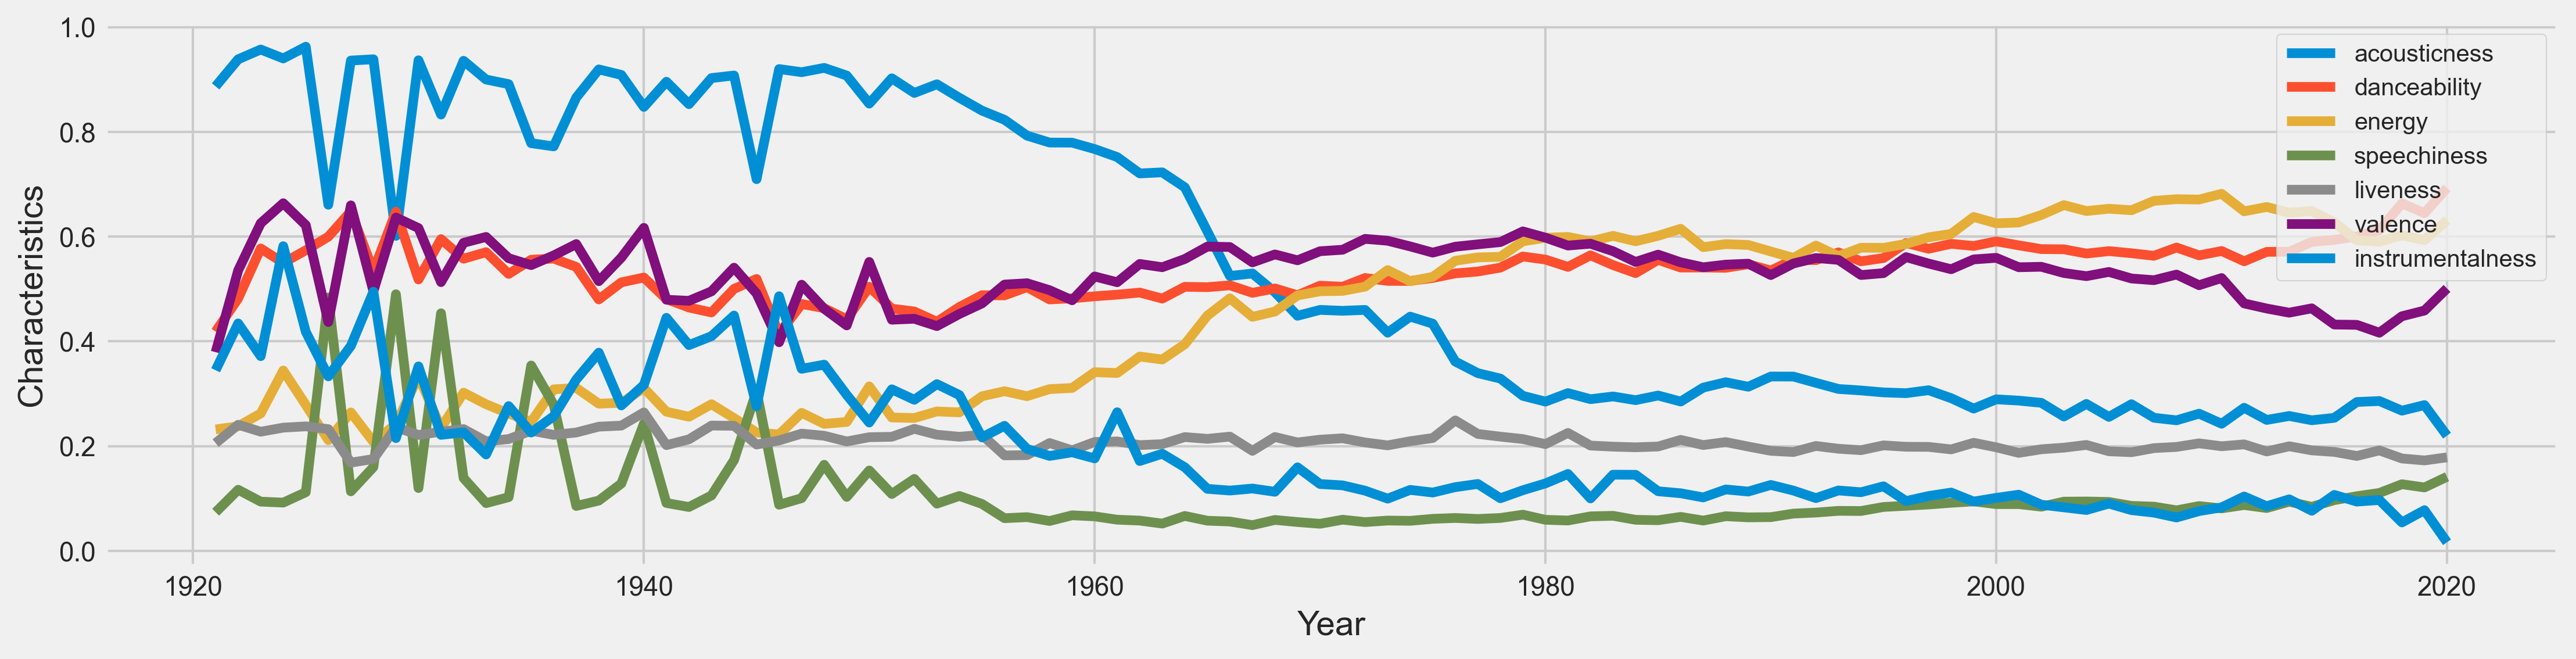

In [9]:
# Audio characteristics over the years
columns = ['acousticness', 'danceability', 'energy', 'speechiness', 'liveness', 'valence', 'instrumentalness']
for i in columns:
    x = df.groupby('year')[i].mean()
    sns.lineplot(x=x.index, y=x, label=i)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Characteristics', fontsize=14)
plt.legend(prop={'size': 10}, loc = 'upper right')
plt.tight_layout()

Mean value of danceability: 0.5373955347986852


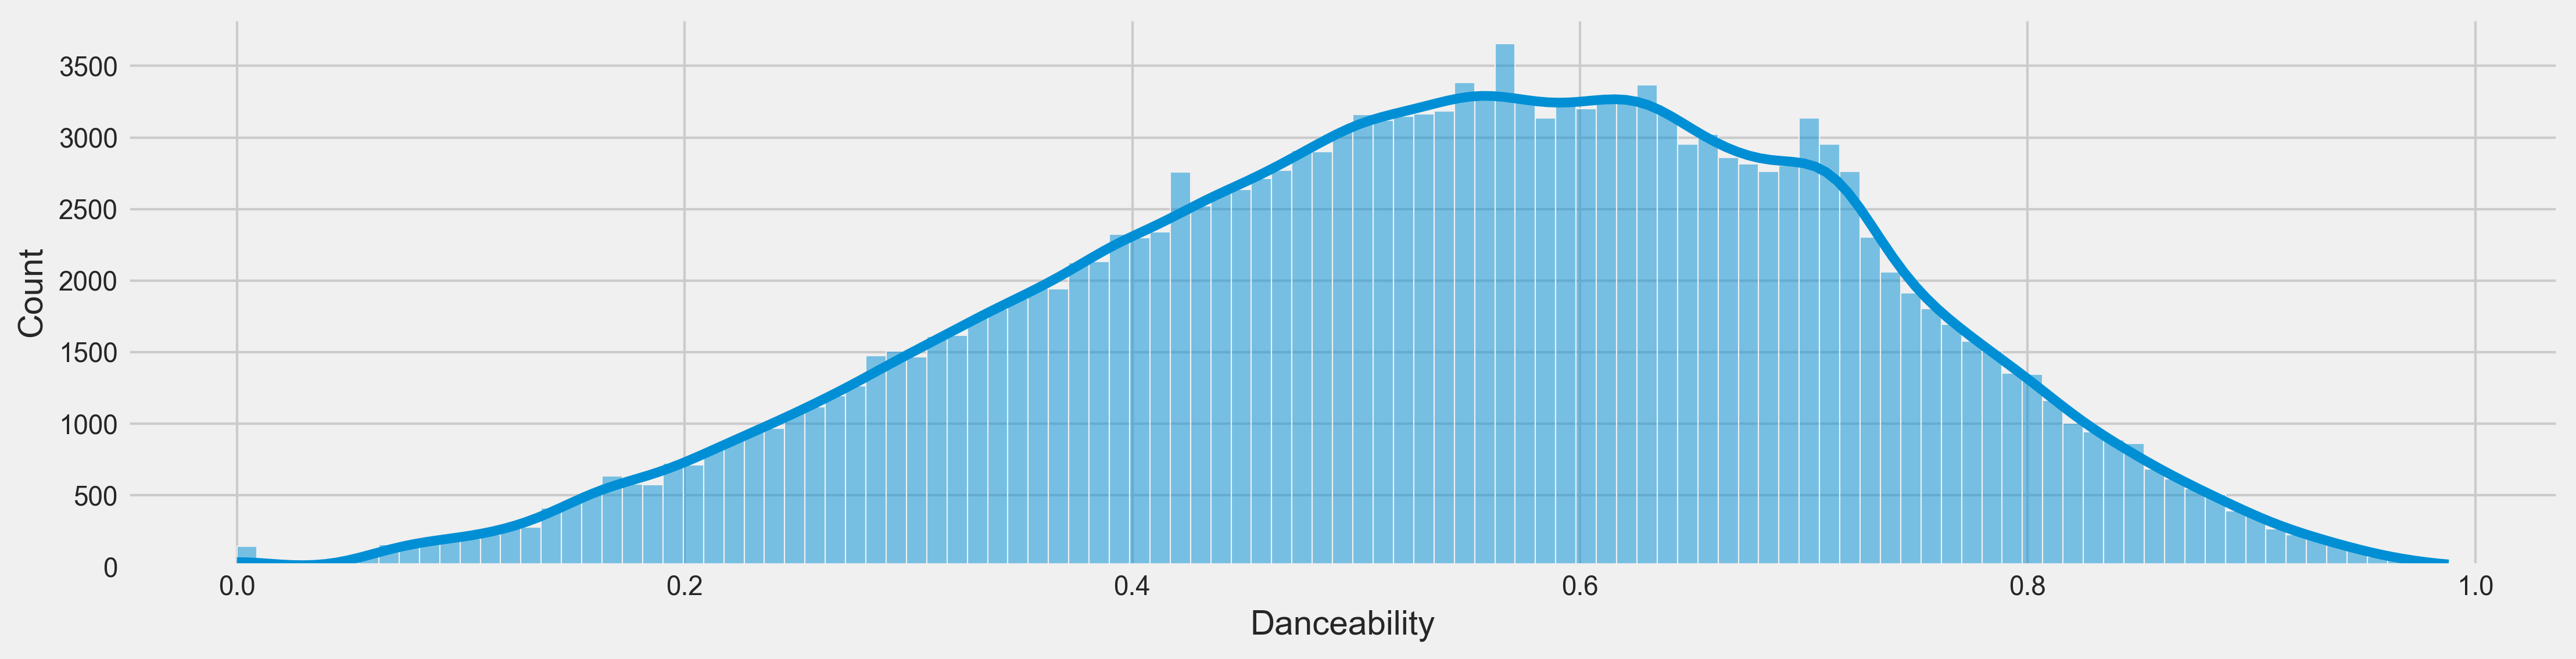

In [10]:
# mean value and histplot for danceability feature
print("Mean value of danceability:", df['danceability'].mean())
sns.histplot(x='danceability', data=df, kde=True)
plt.xlabel('Danceability', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

With an average of 0.53, it seems like the majority of the tracks are danceable.

Mean value of energy: 0.4823888351127728


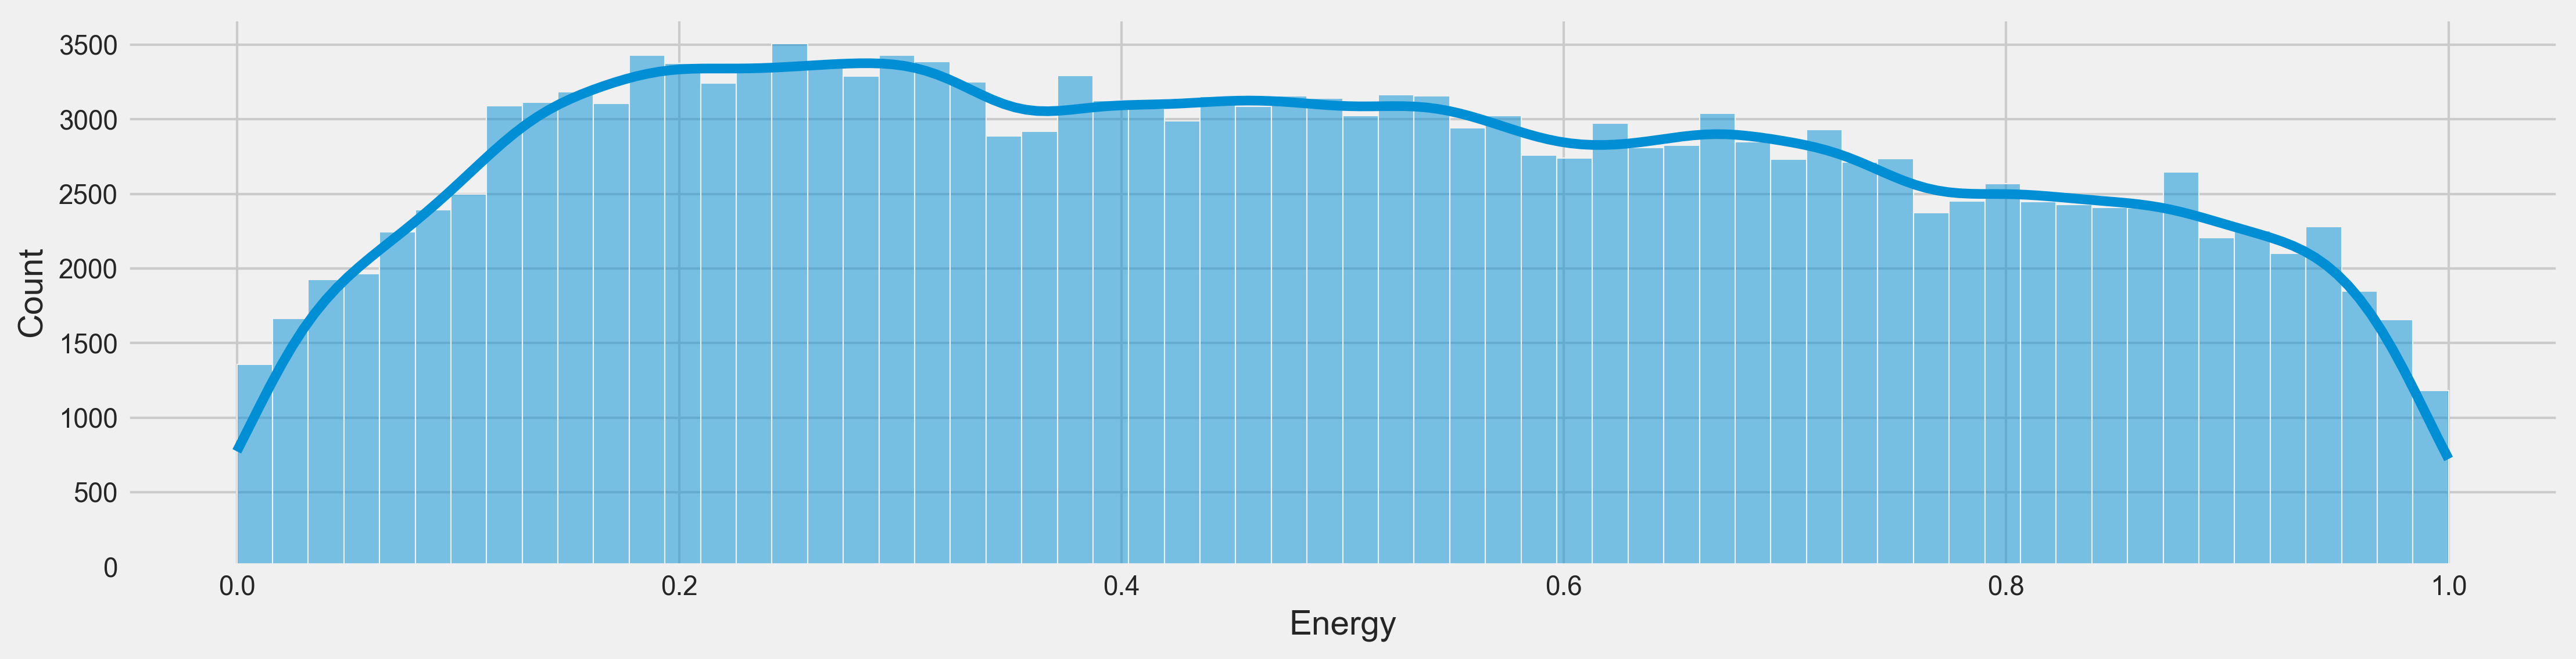

In [11]:
# mean value and histplot for for energy feature
print("Mean value of energy:", df['energy'].mean())
sns.histplot(x='energy', data=df, kde=True)
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

Similar to danceability feature, with an average of 0.48, it seems like the majority of the tracks feel fast, loud, and noisy.

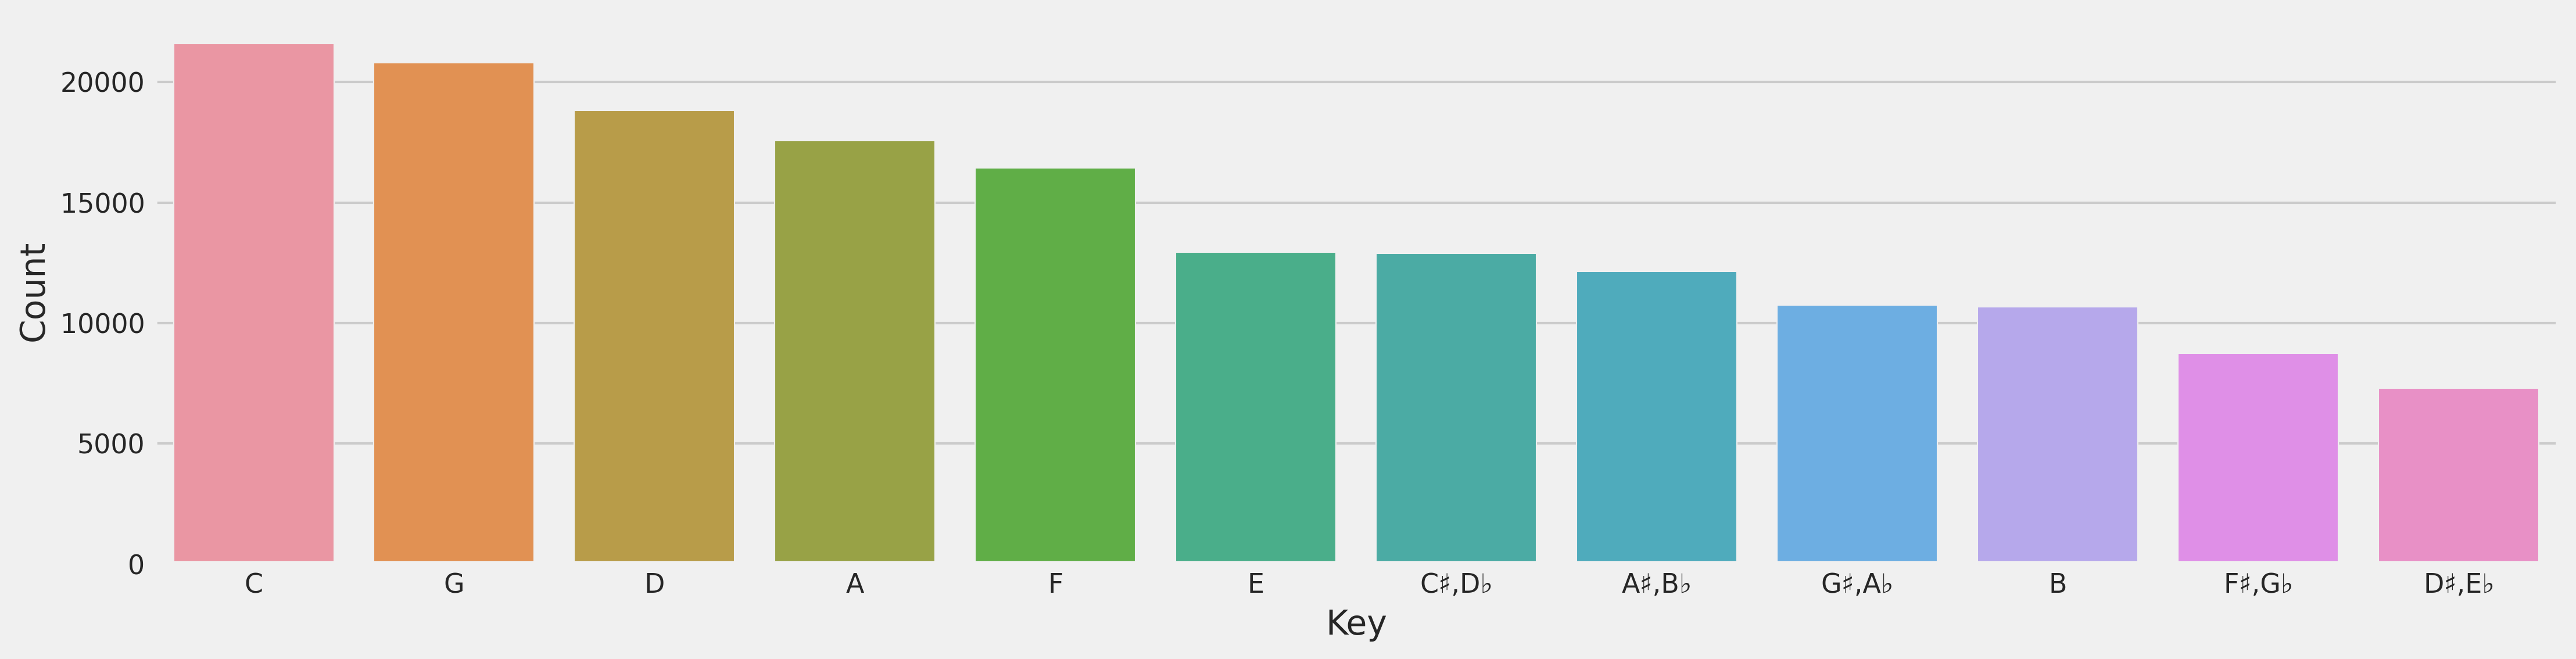

In [12]:
#map the numeric values of key to notes
key_mapping = {0: 'C', 1: 'C♯,D♭', 2: 'D', 3: 'D♯,E♭', 4: 'E', 5: 'F', 6: 'F♯,G♭', 7: 'G', 8: 'G♯,A♭', 9: 'A', 10: 'A♯,B♭', 11: 'B'}
df['key'] = df['key'].map(key_mapping)

sns.set_style({'font.family': ['sans-serif'], 'font.sans-serif': ['DejaVu Sans']})
sns.countplot(x ='key', data=df, order=df['key'].value_counts().index)
plt.xlabel('Key', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Key is the major or minor scale around which a piece of music revolves.

As shown above, the most common key among the tracks is C.

Mean value of loudness: -11.467990038264784


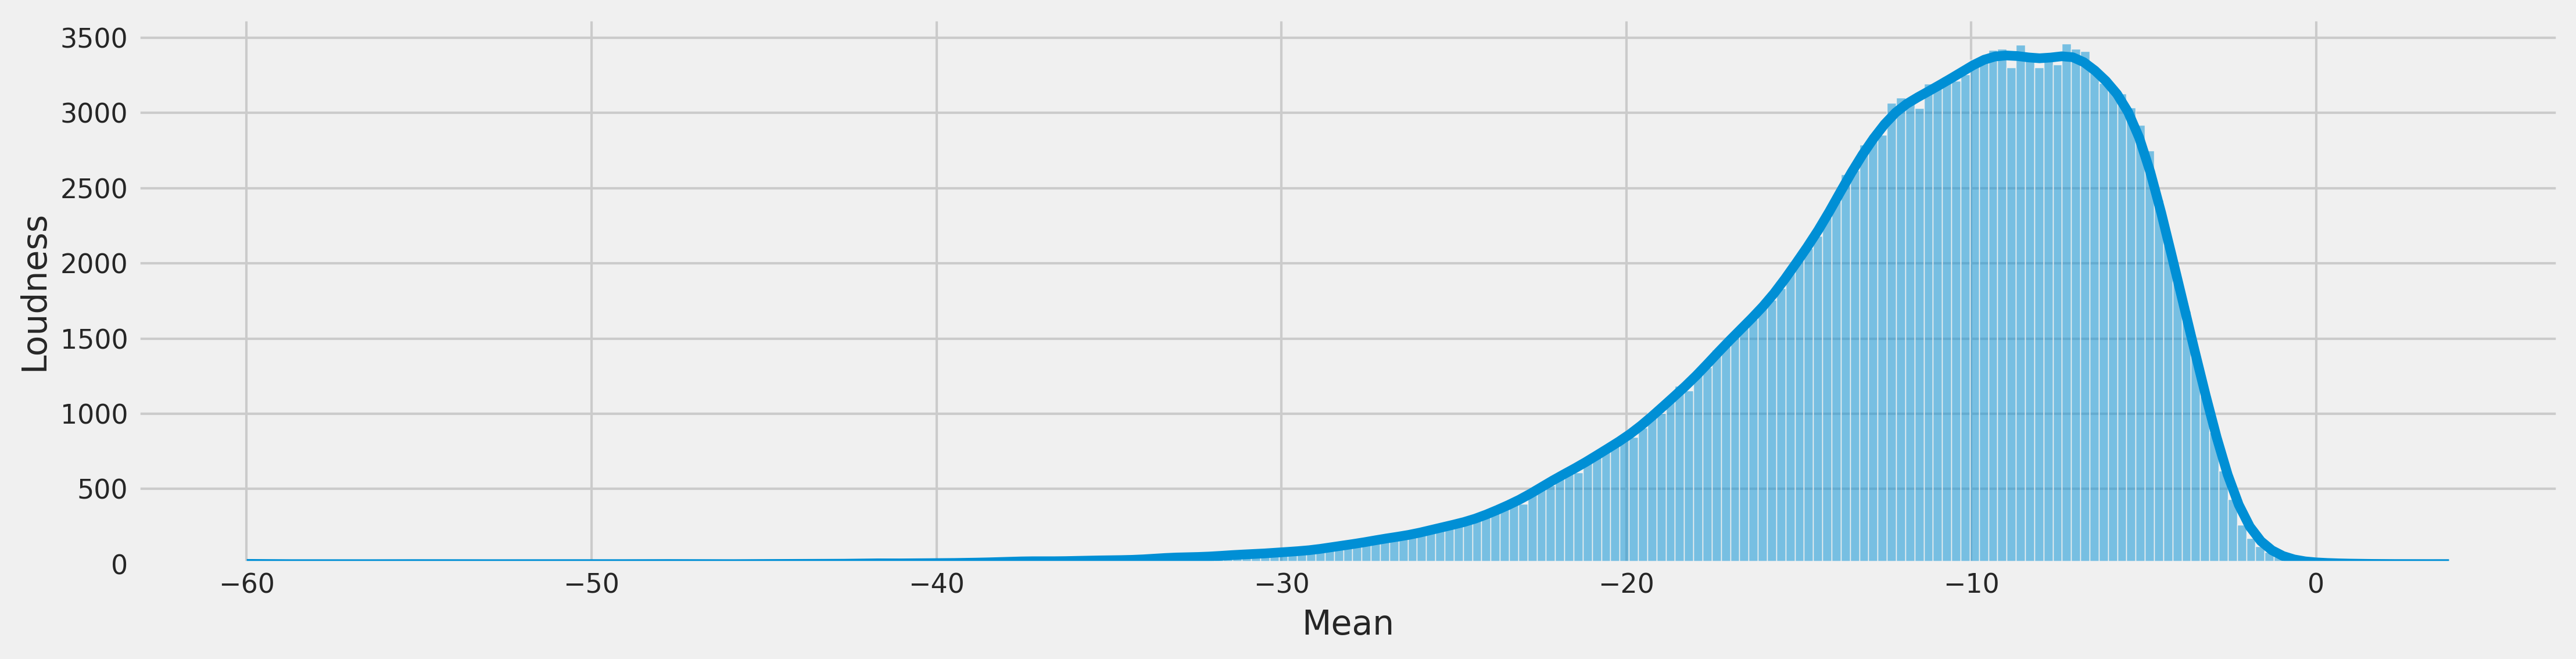

In [13]:
# mean value and histplot for loudness feature
print("Mean value of loudness:", df['loudness'].mean())
sns.histplot(x='loudness', data=df, kde=True)
plt.xlabel('Mean', fontsize=14)
plt.ylabel('Loudness', fontsize=14)
plt.tight_layout()

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.

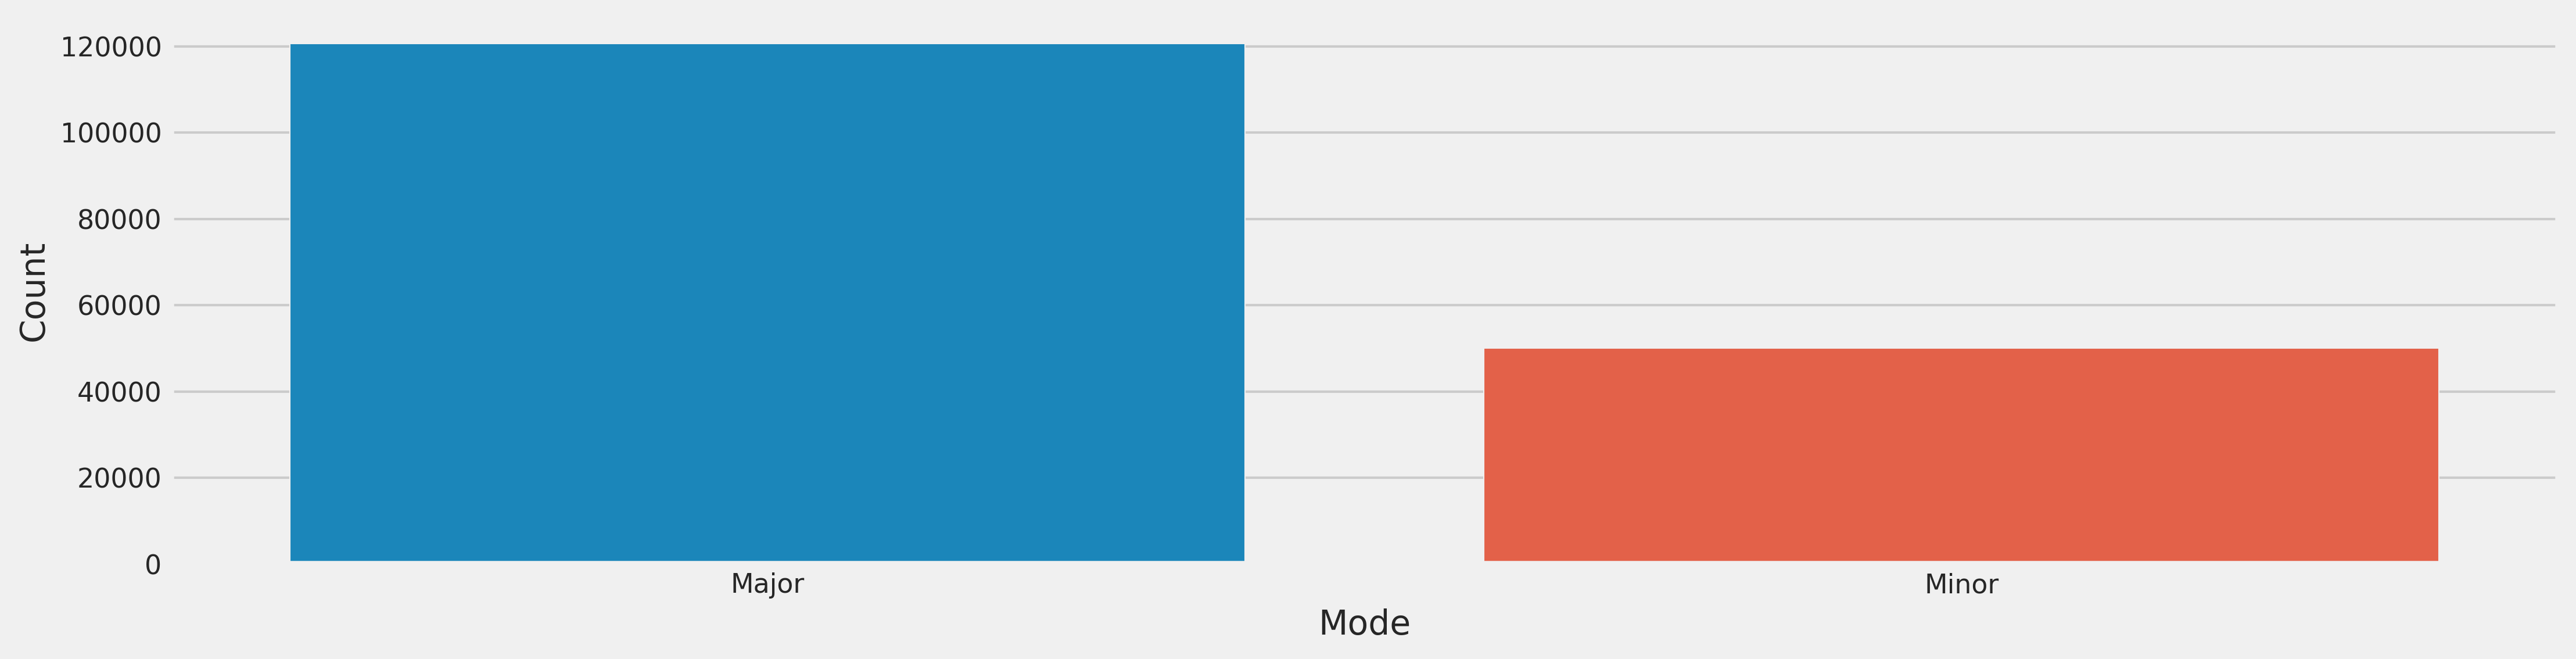

In [14]:
#map the binary value of mode to major/minor
mode_mapping = {1.0: "Major", 0.0: "Minor"}
df['mode'] = df['mode'].map(mode_mapping)

#draw a countplot of the values
sns.countplot(x ='mode', data=df)
plt.xlabel('Mode', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.

More than 120000 songs are major; on the other hand, more than 50000 songs are minor.

Mean value of speechiness: 0.09839326235108671


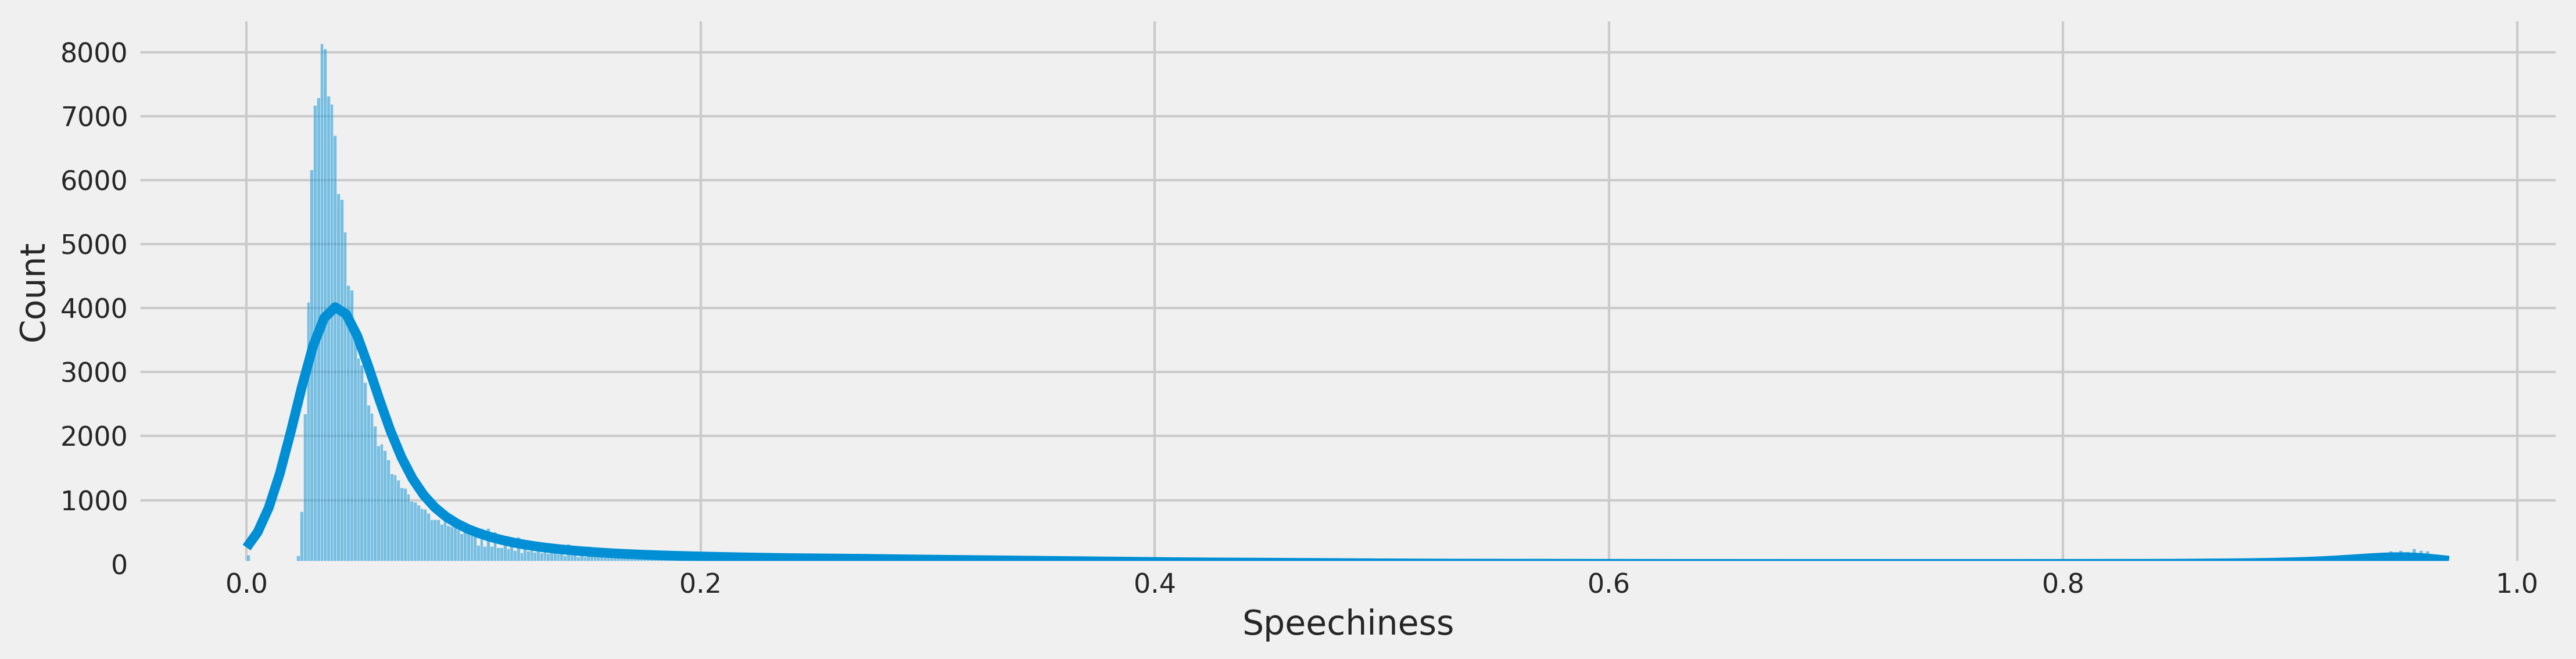

In [15]:
# mean value and histplot for speechiness feature
print("Mean value of speechiness:", df['speechiness'].mean())
sns.histplot(x='speechiness', data=df, kde=True)
plt.xlabel('Speechiness', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

With an average of 0.09, we can conclude that all songs do not sound like an audio book, a poetry, or a talk show.

Mean value of acousticness: 0.5021147637067032


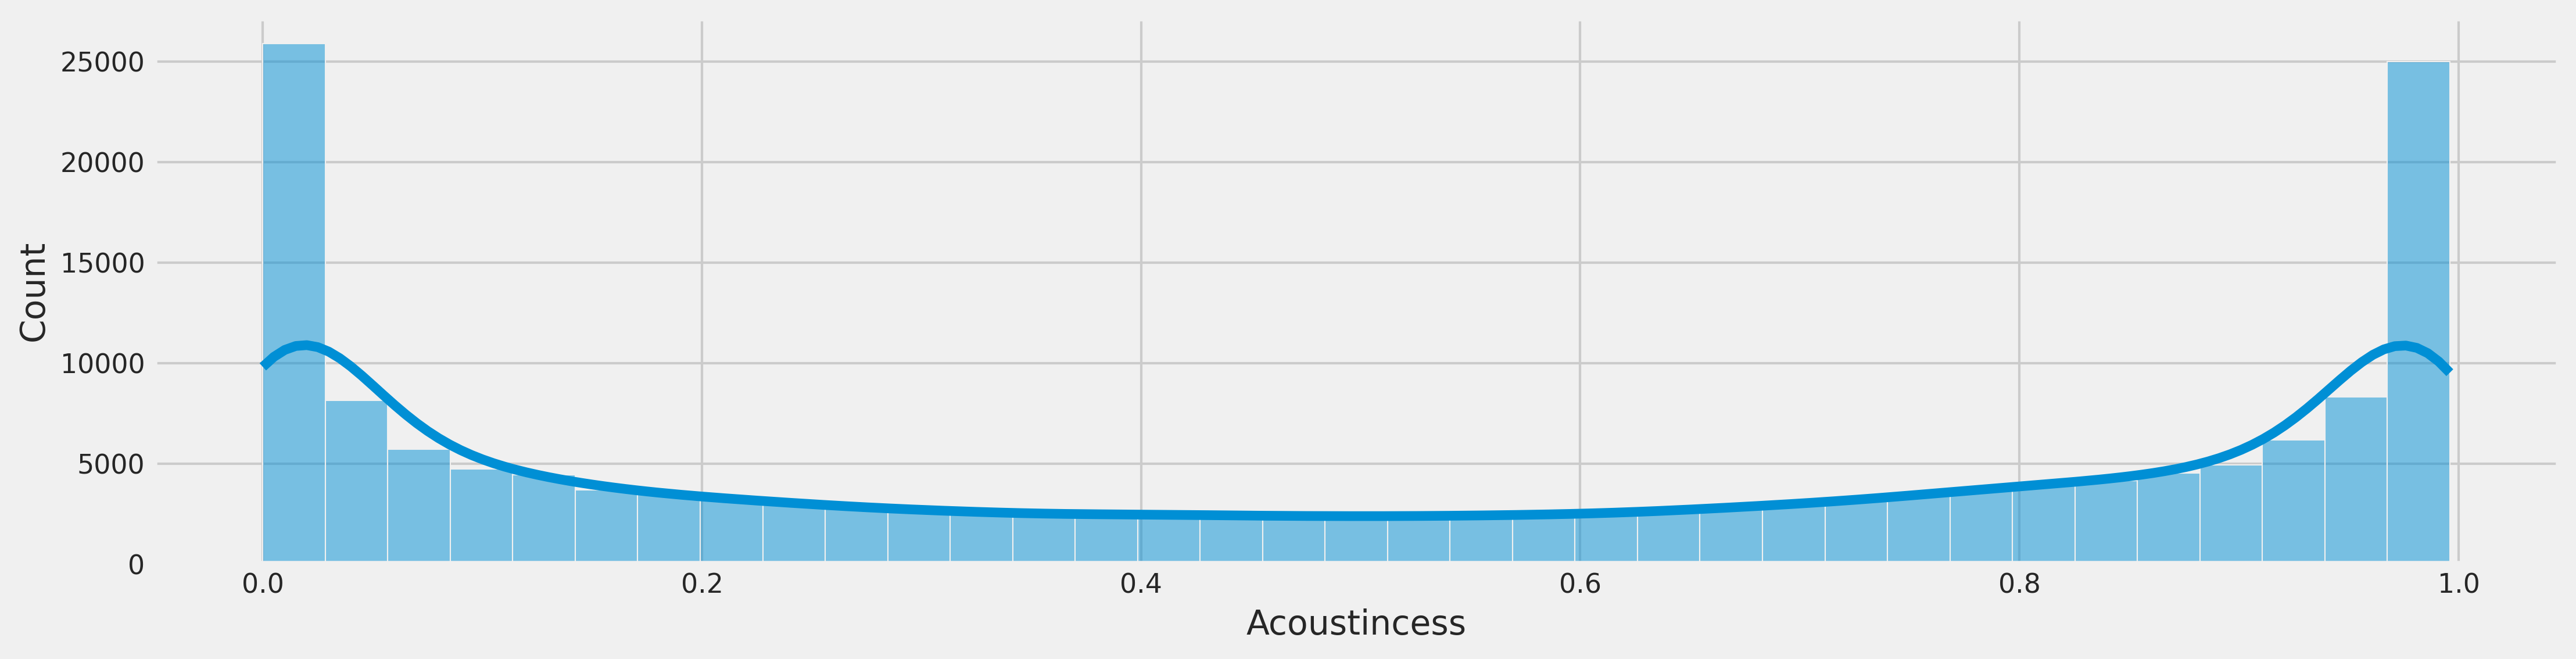

In [16]:
# mean value and histplot for acousticness feature
print("Mean value of acousticness:", df['acousticness'].mean())
sns.histplot(x='acousticness', data=df, kde=True)
plt.xlabel('Acoustincess', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

A measure from 0.0 to 1.0 of whether the track is acoustic.

With an average of 0.50, Spotify streamers seem to stream acoustic songs.

Mean value of instrumentalness: 0.16700958082940237


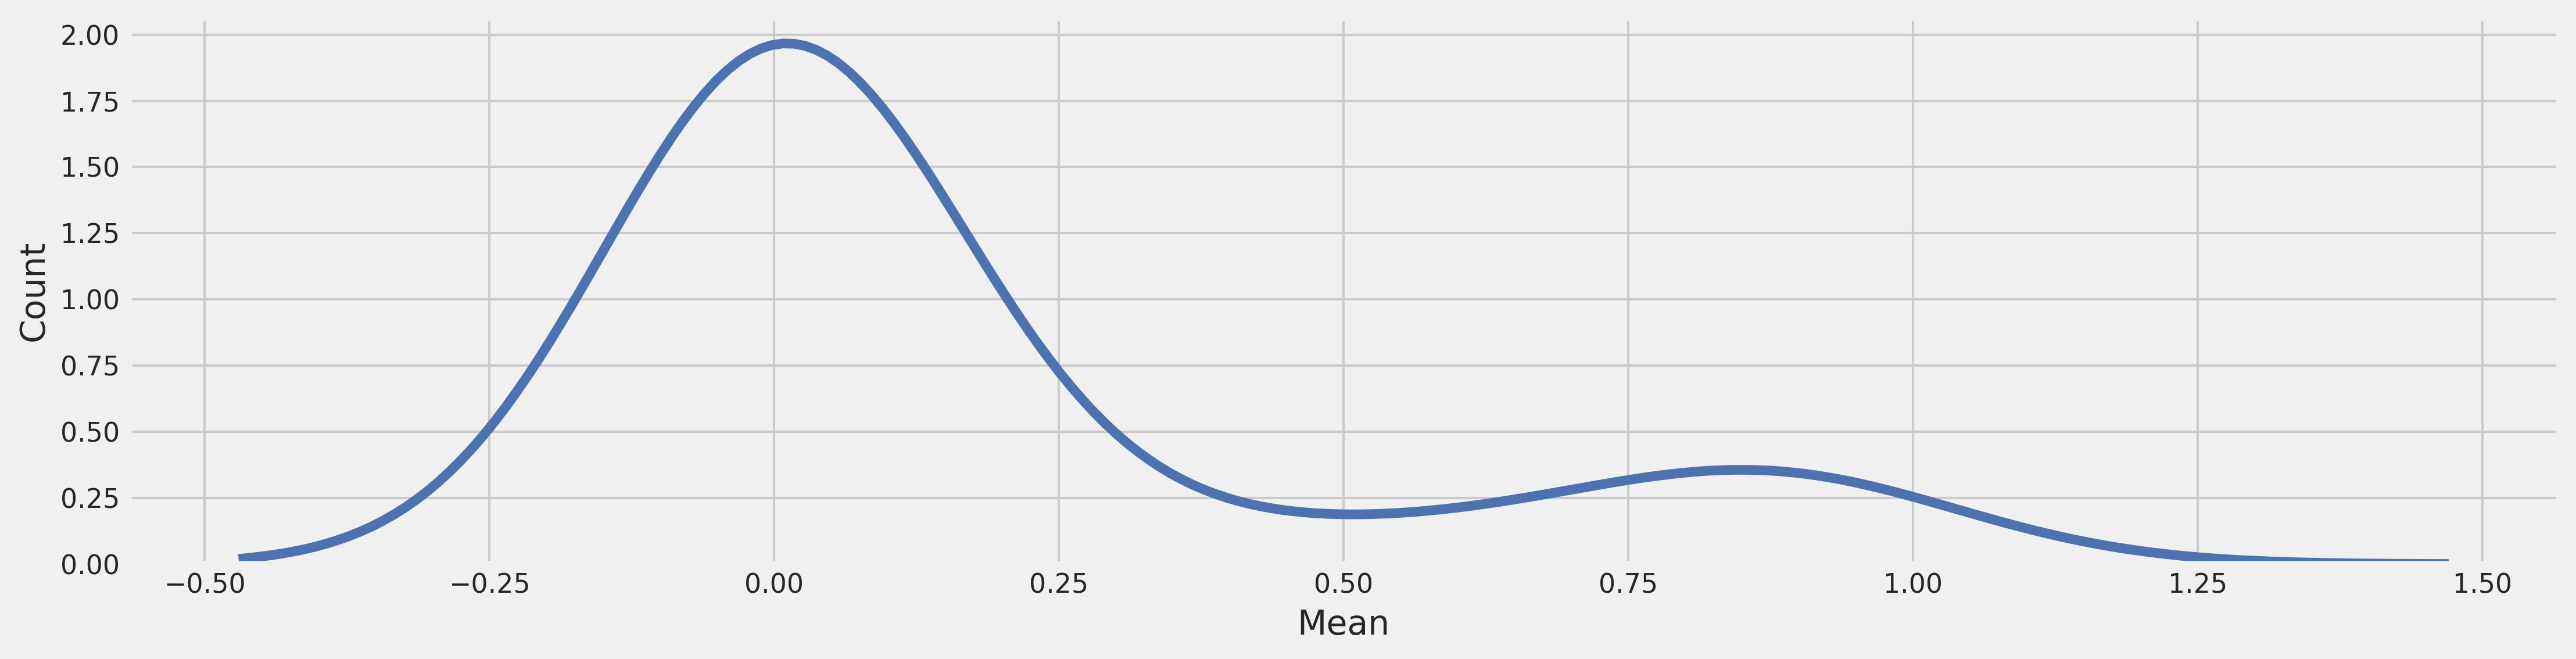

In [17]:
# mean value and histplot for instrumentalness feature
print("Mean value of instrumentalness:", df['instrumentalness'].mean())
sns.kdeplot(np.array(df['instrumentalness']), color='b', bw_method=0.5, label='keyword')
plt.xlabel('Mean', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

With an average of 0.167, few tracks contain no vocals.

Mean value of liveness: 0.20583865545873795


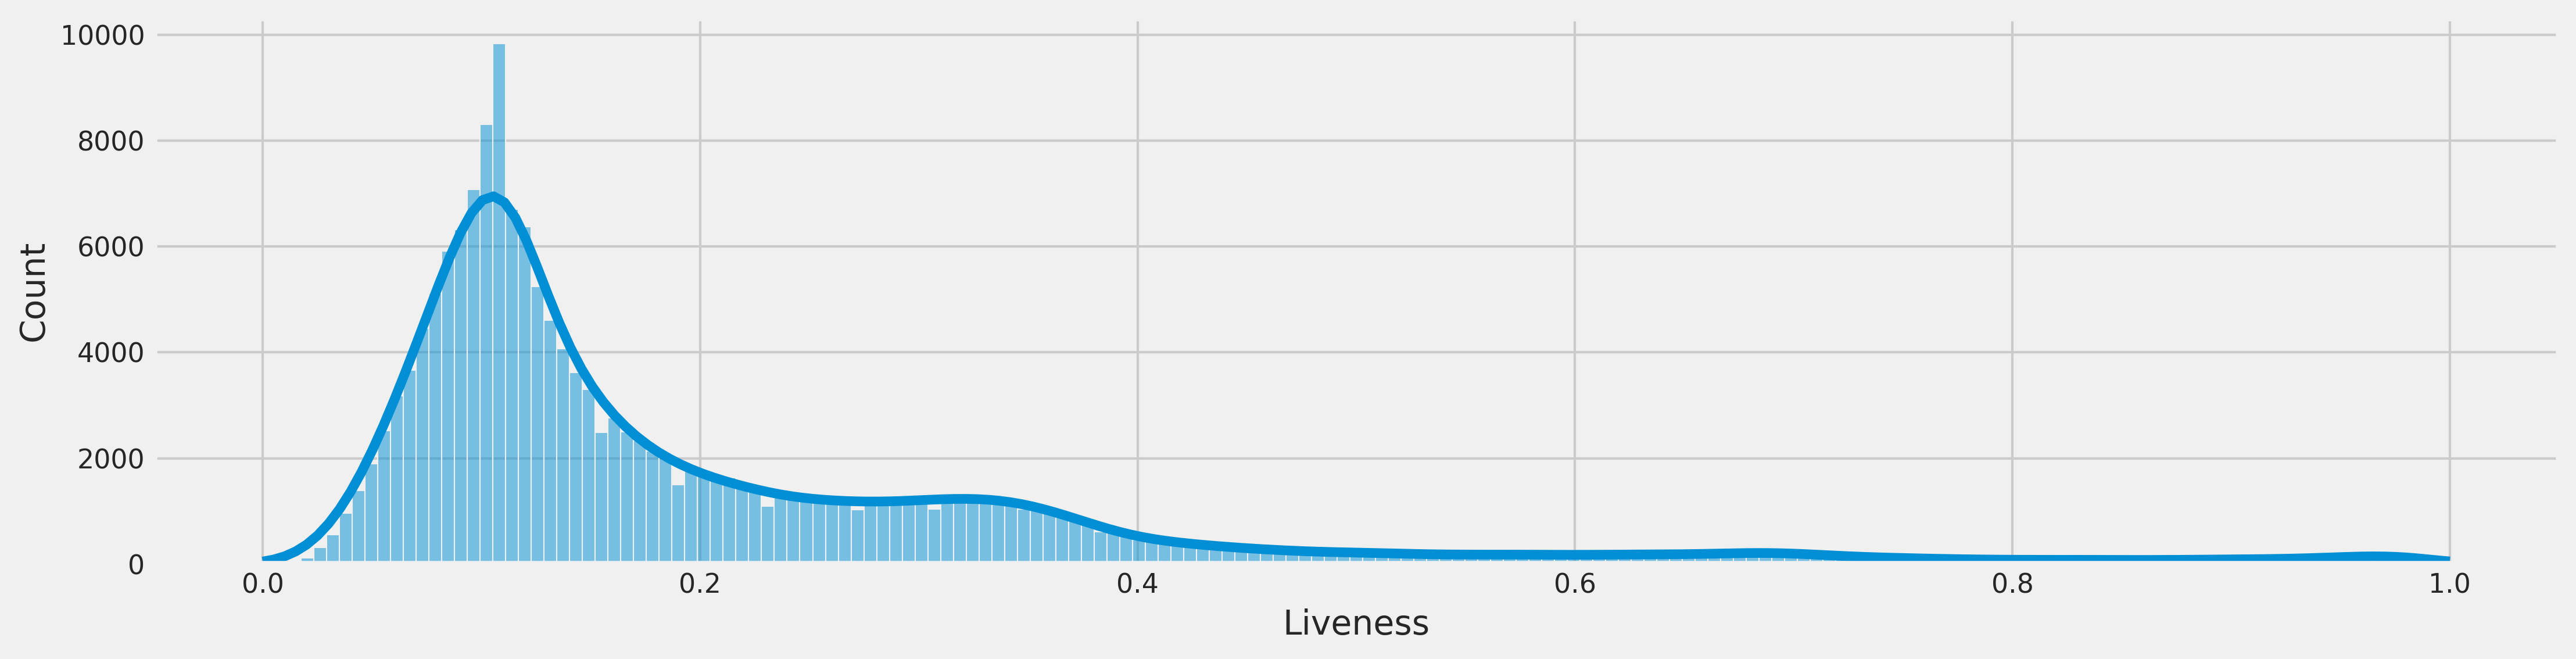

In [18]:
# mean value and histplot for valence feature
print('Mean value of liveness:', df['liveness'].mean())
sns.histplot(x='liveness', data=df, kde=True)
plt.xlabel('Liveness', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

With an average of 0.20, perhaps some of the songs are sad.

Mean value of tempo: 116.86158961752797


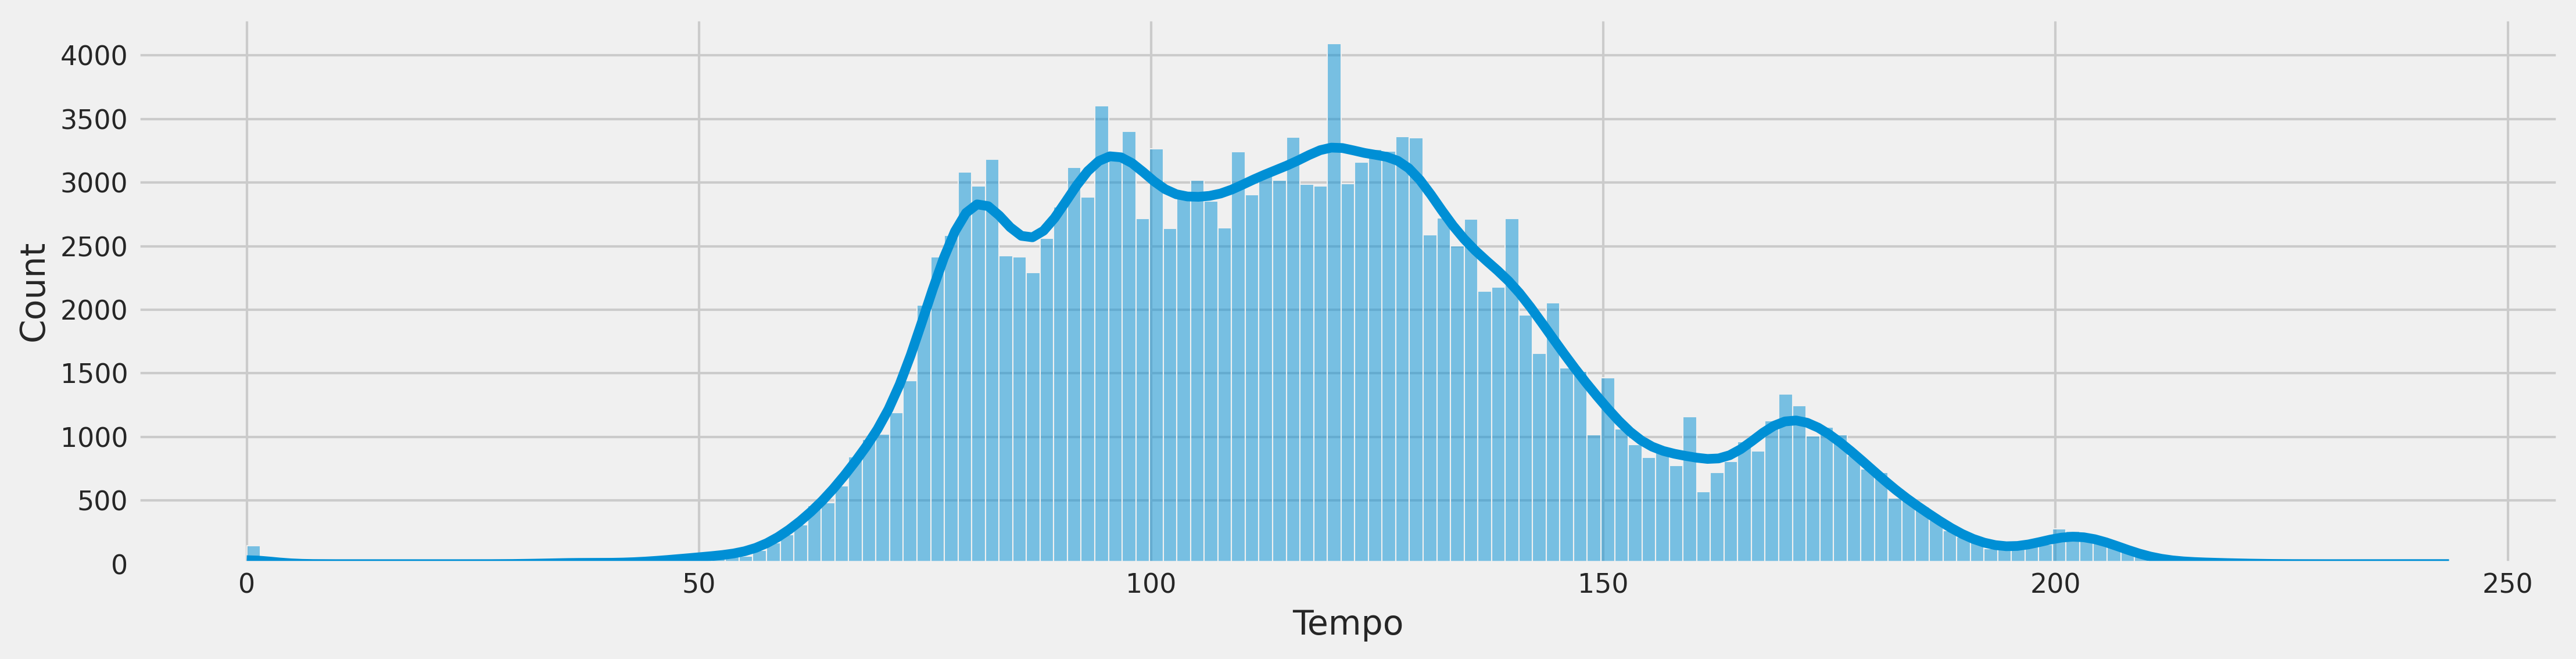

In [19]:
# mean value and histplot for tempo feature
print('Mean value of tempo:', df['tempo'].mean())
sns.histplot(x='tempo', data=df, kde=True)
plt.xlabel('Tempo', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

With an average of 116.86, we can tell that most tracks are in normal speed rate. We can see a few songs even have more than 200 BPM; therefore, a few songs perhaps are rap songs.

Mean value of duration_ms: 230948.3106655025


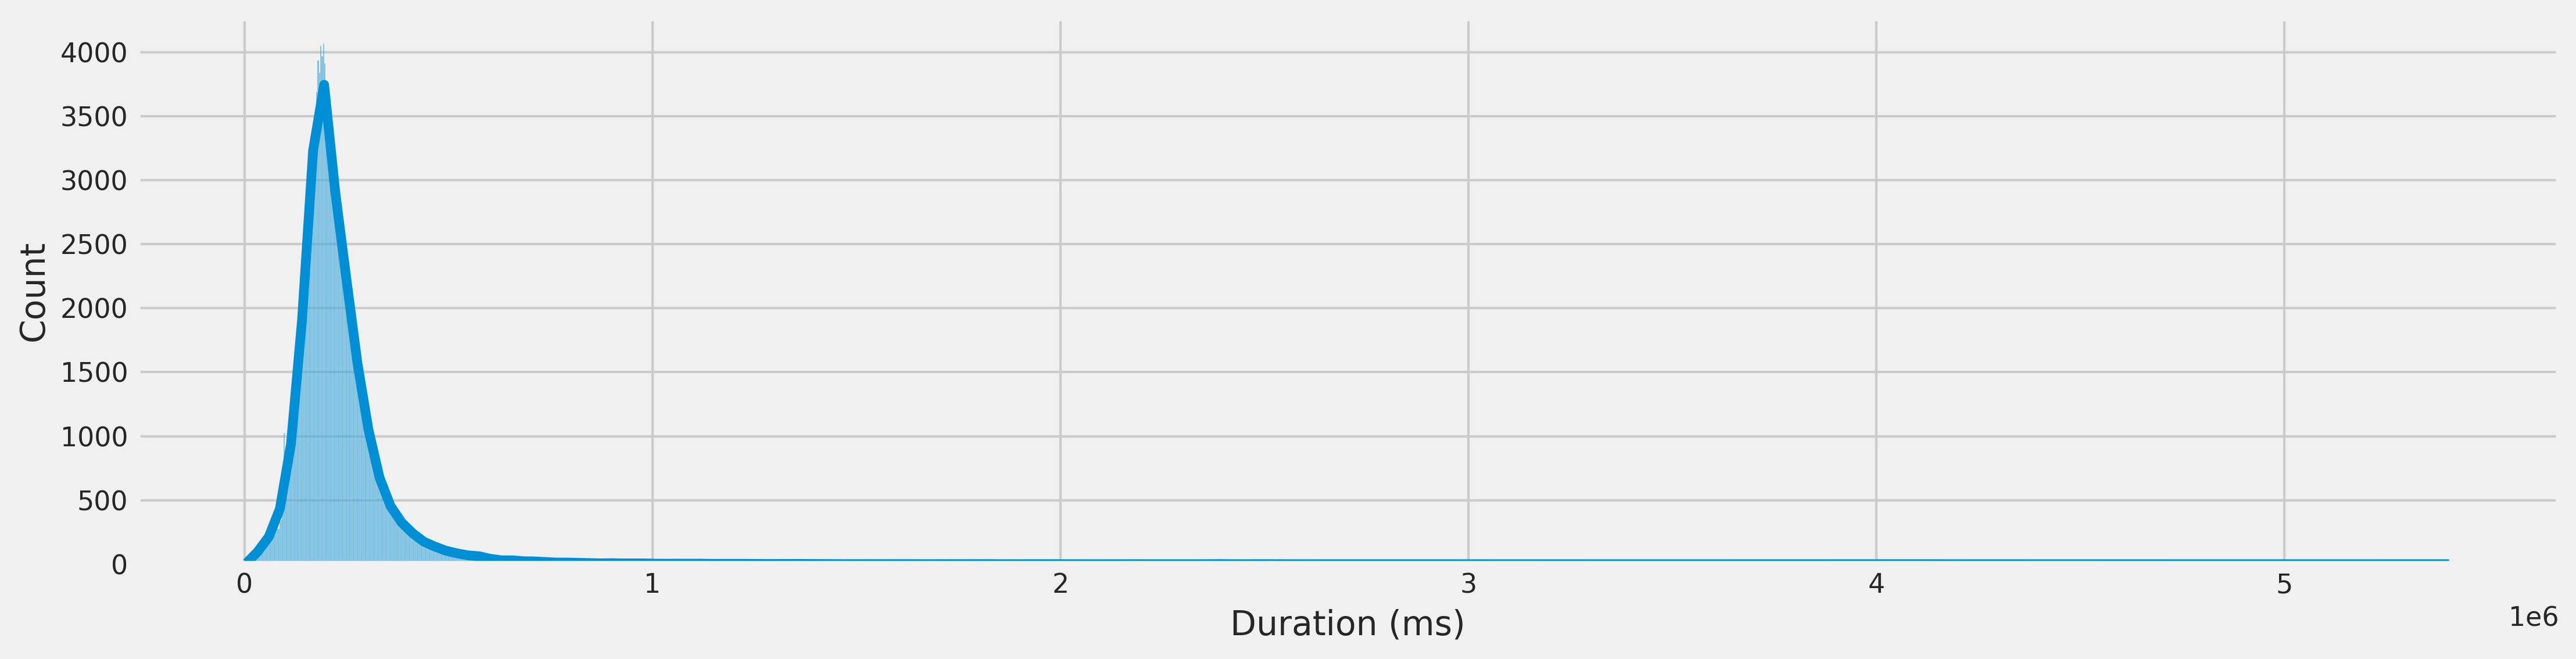

In [20]:
# mean value and histplot for duration_ms feature
print('Mean value of duration_ms:', df['duration_ms'].mean())
sns.histplot(x='duration_ms', data=df, kde=True)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

ith an average of 230948, which can be interpreted as ~4 minutes, we can assume that most tracks are 4 minutes.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6904\3313697093.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
C:\Users\KIIT\AppData\Local\Temp\ipykernel_6904\3313697093.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')


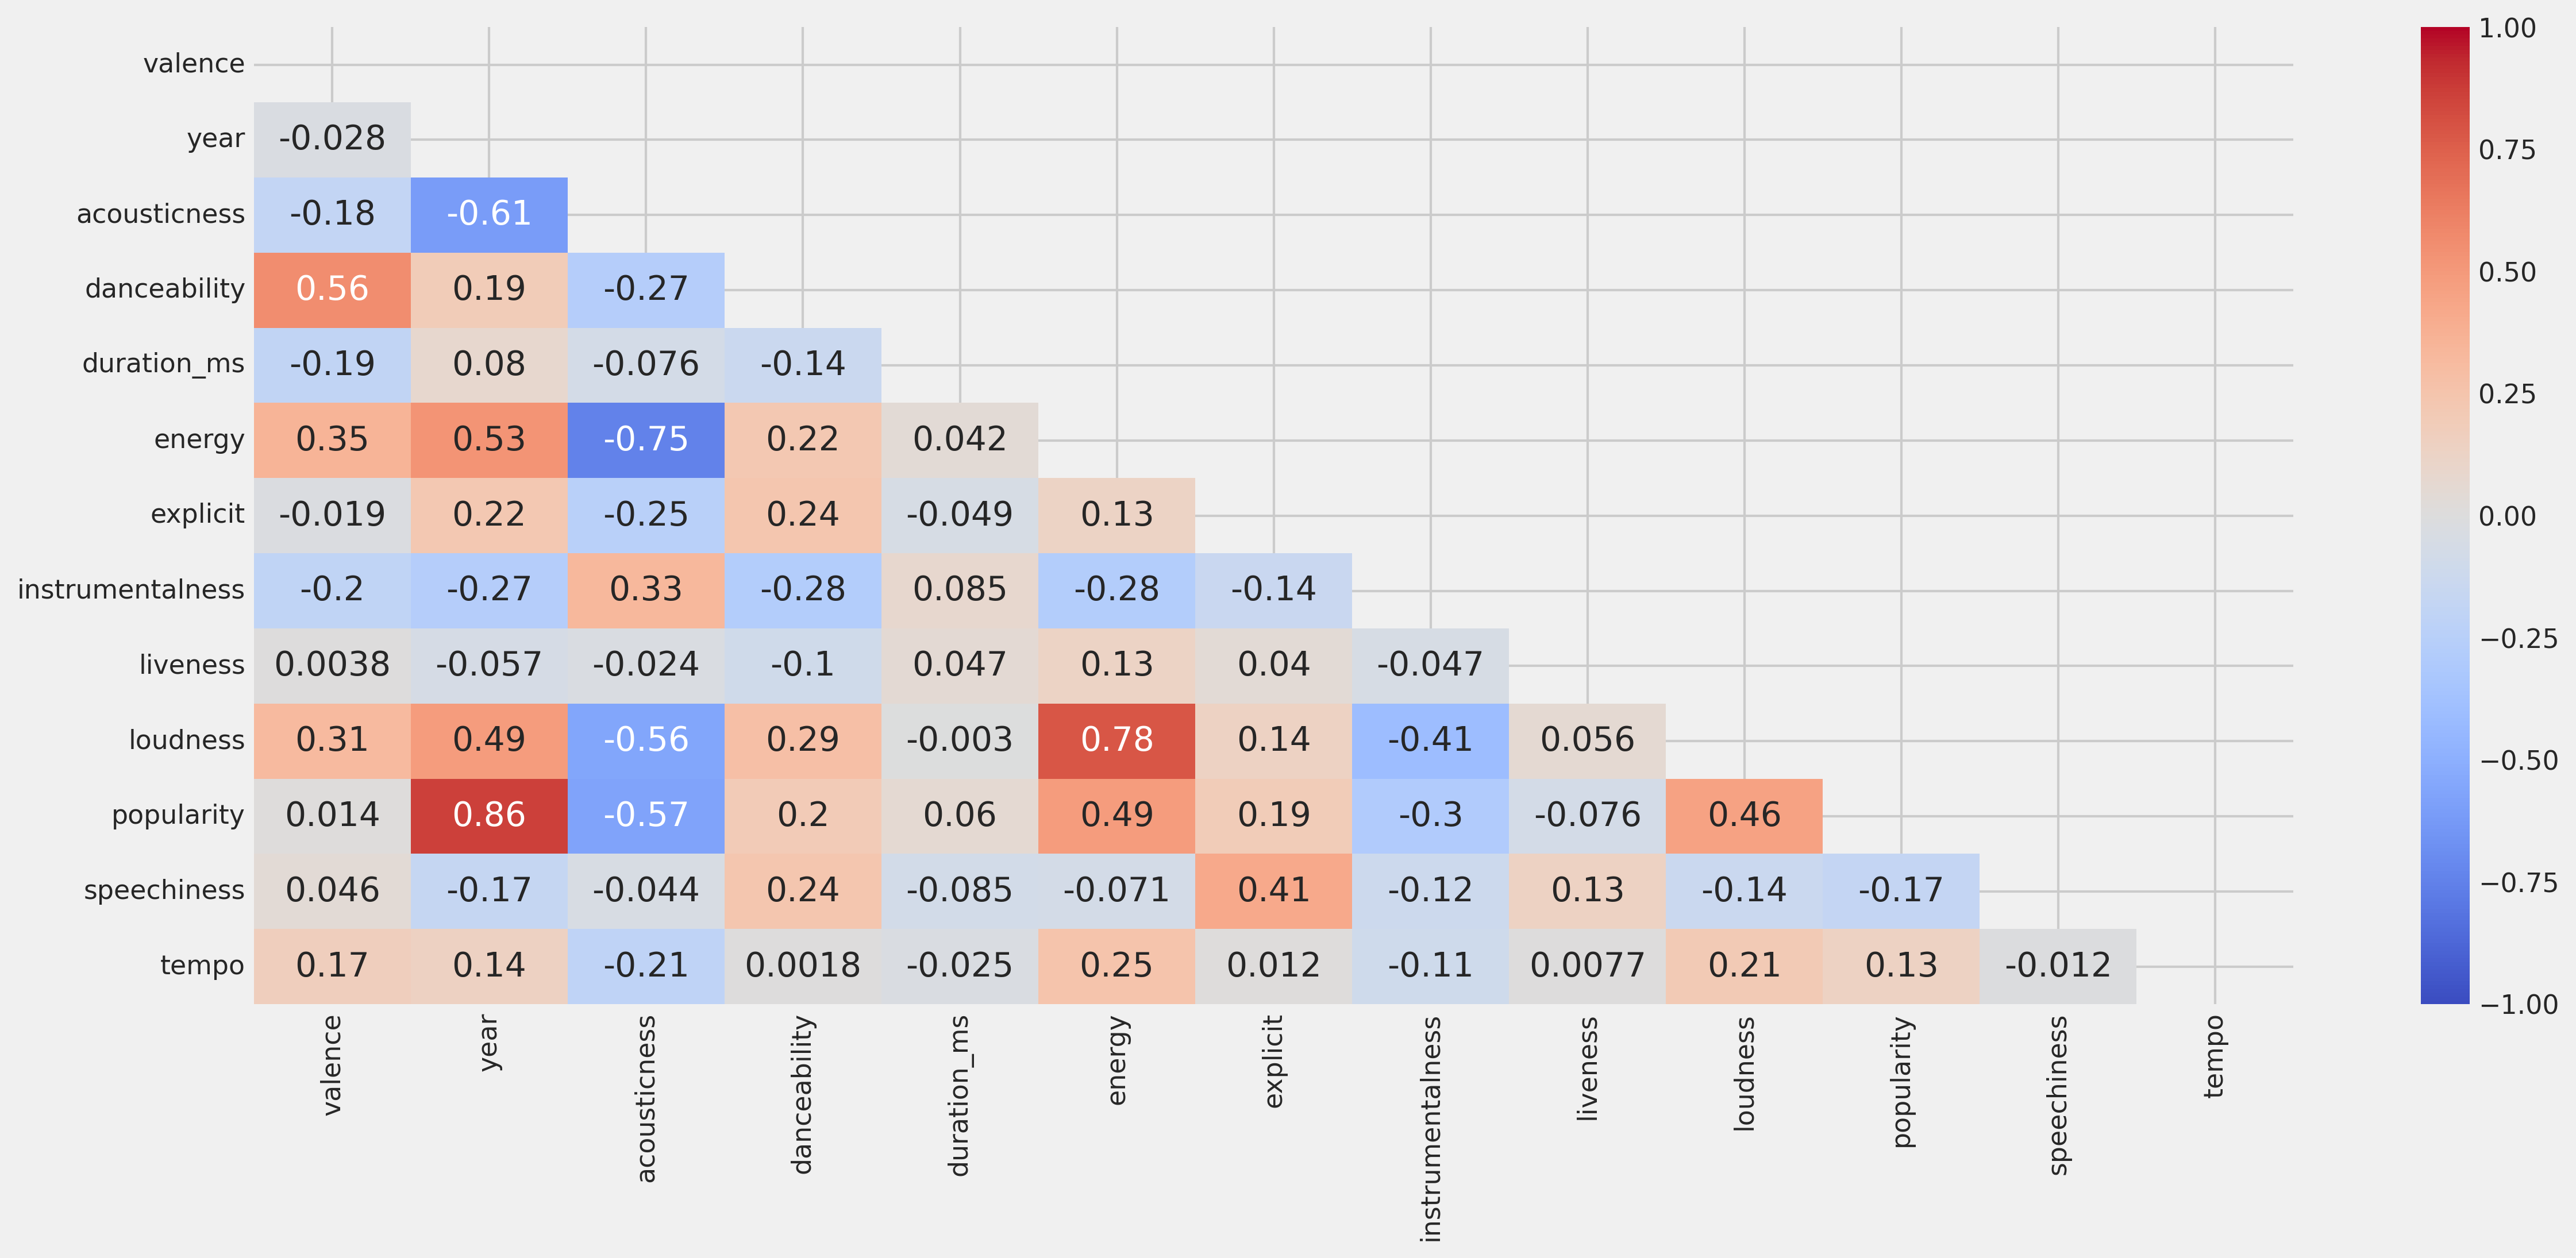

In [24]:
# triangle correlation heatmap
plt.figure(figsize=(17, 7))
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

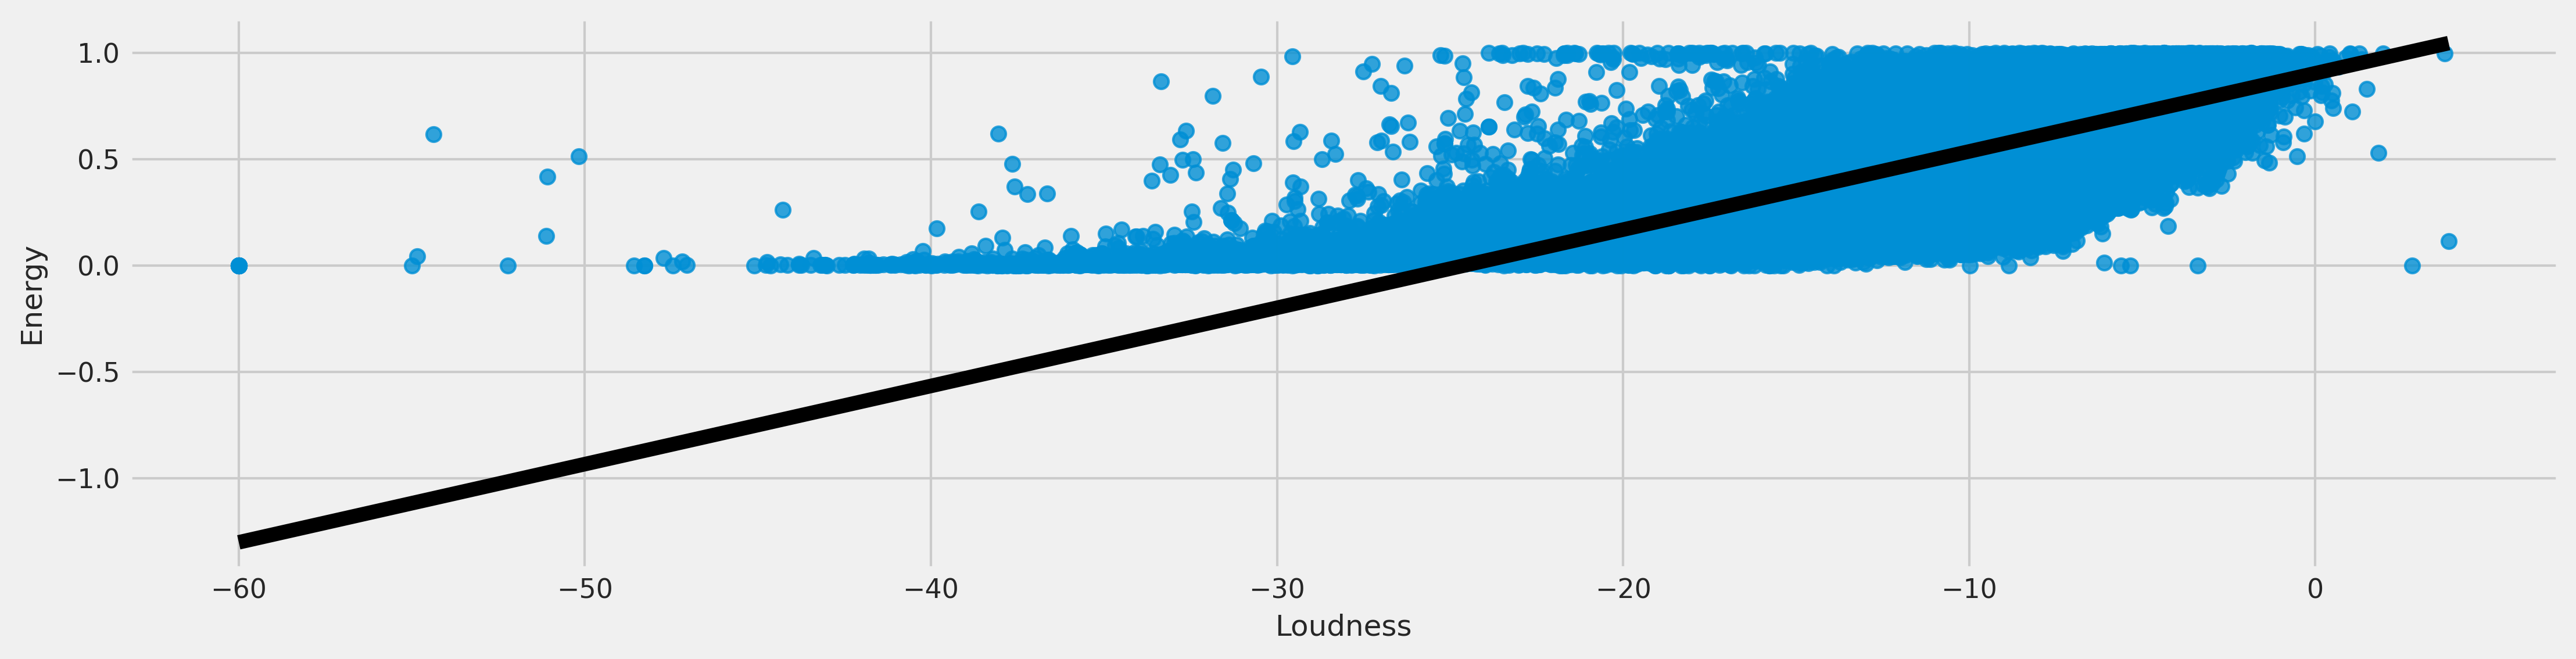

In [25]:
# scatterplot for loudness and energy
# sns.relplot(x='loudness', y='energy', data=df, kind='scatter', height=3.27, aspect=11.7/3.27)
sns.regplot(x='loudness', y='energy', data=df, line_kws = {'color': 'black'})
plt.xlabel('Loudness', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.tight_layout()

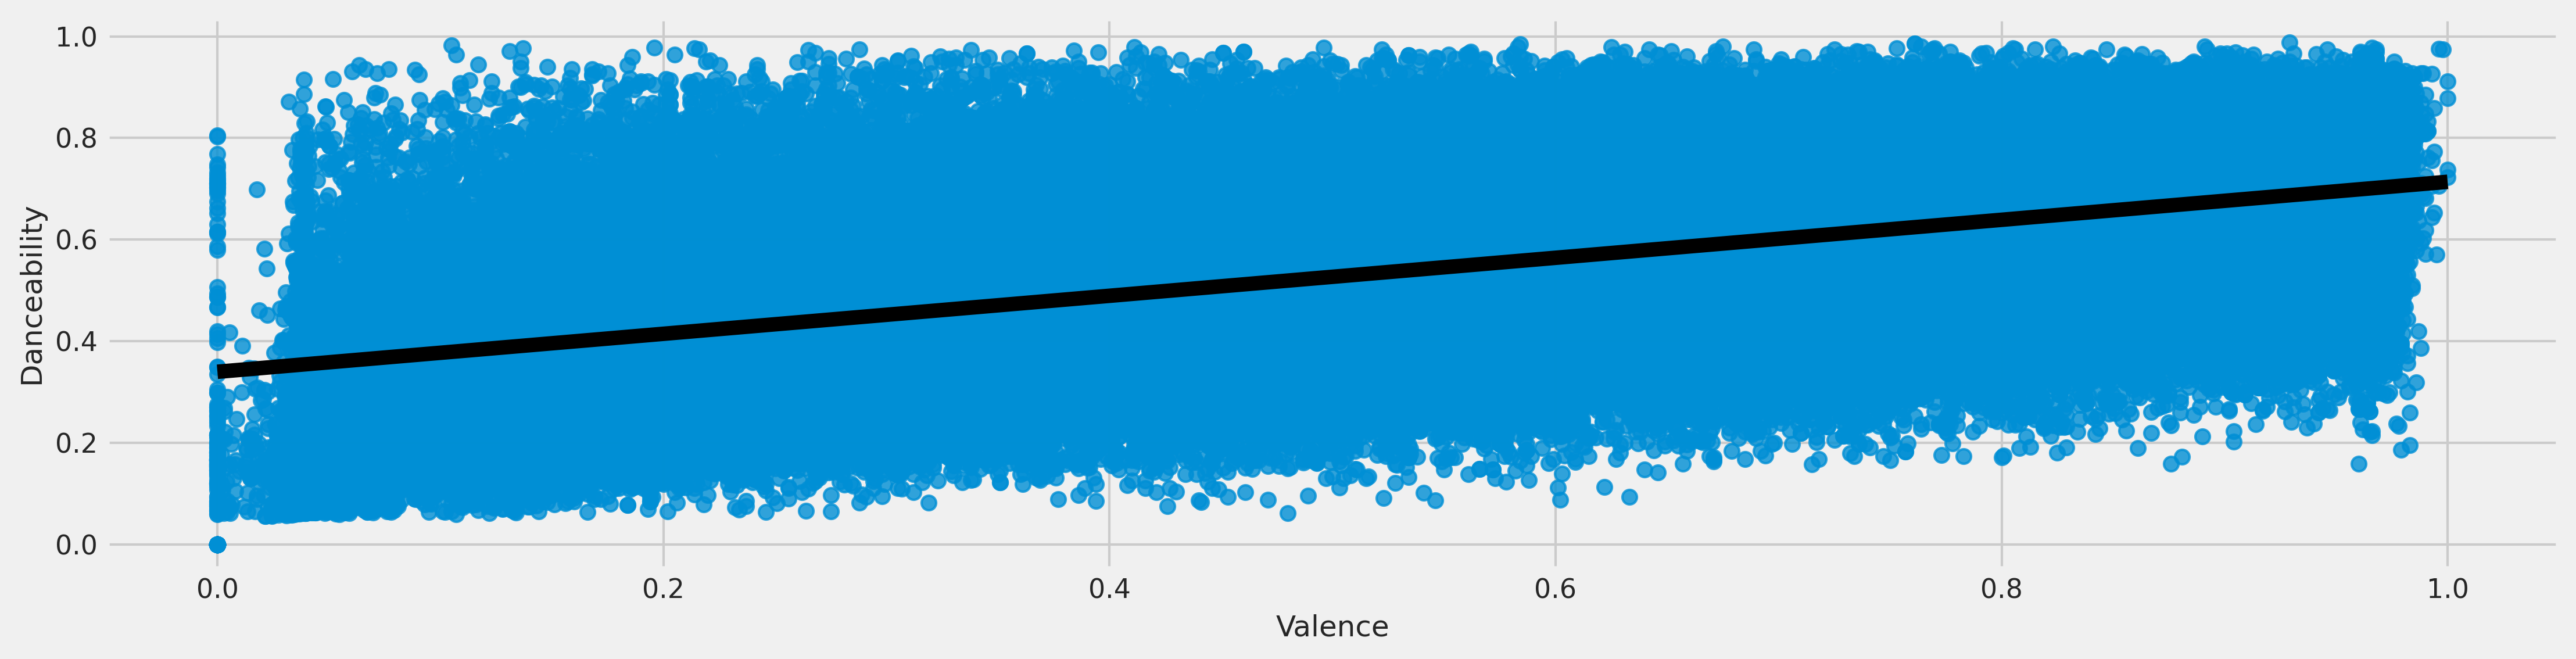

In [28]:
# scatterplot for valence and danceability
# sns.relplot(x='valence', y='danceability', data=df, kind='scatter', height=3.27, aspect=11.7/3.27)
sns.regplot(x='valence', y='danceability', data=df, line_kws = {'color': 'black'})
plt.xlabel('Valence', fontsize=12)
plt.ylabel('Danceability', fontsize=12)
plt.tight_layout()

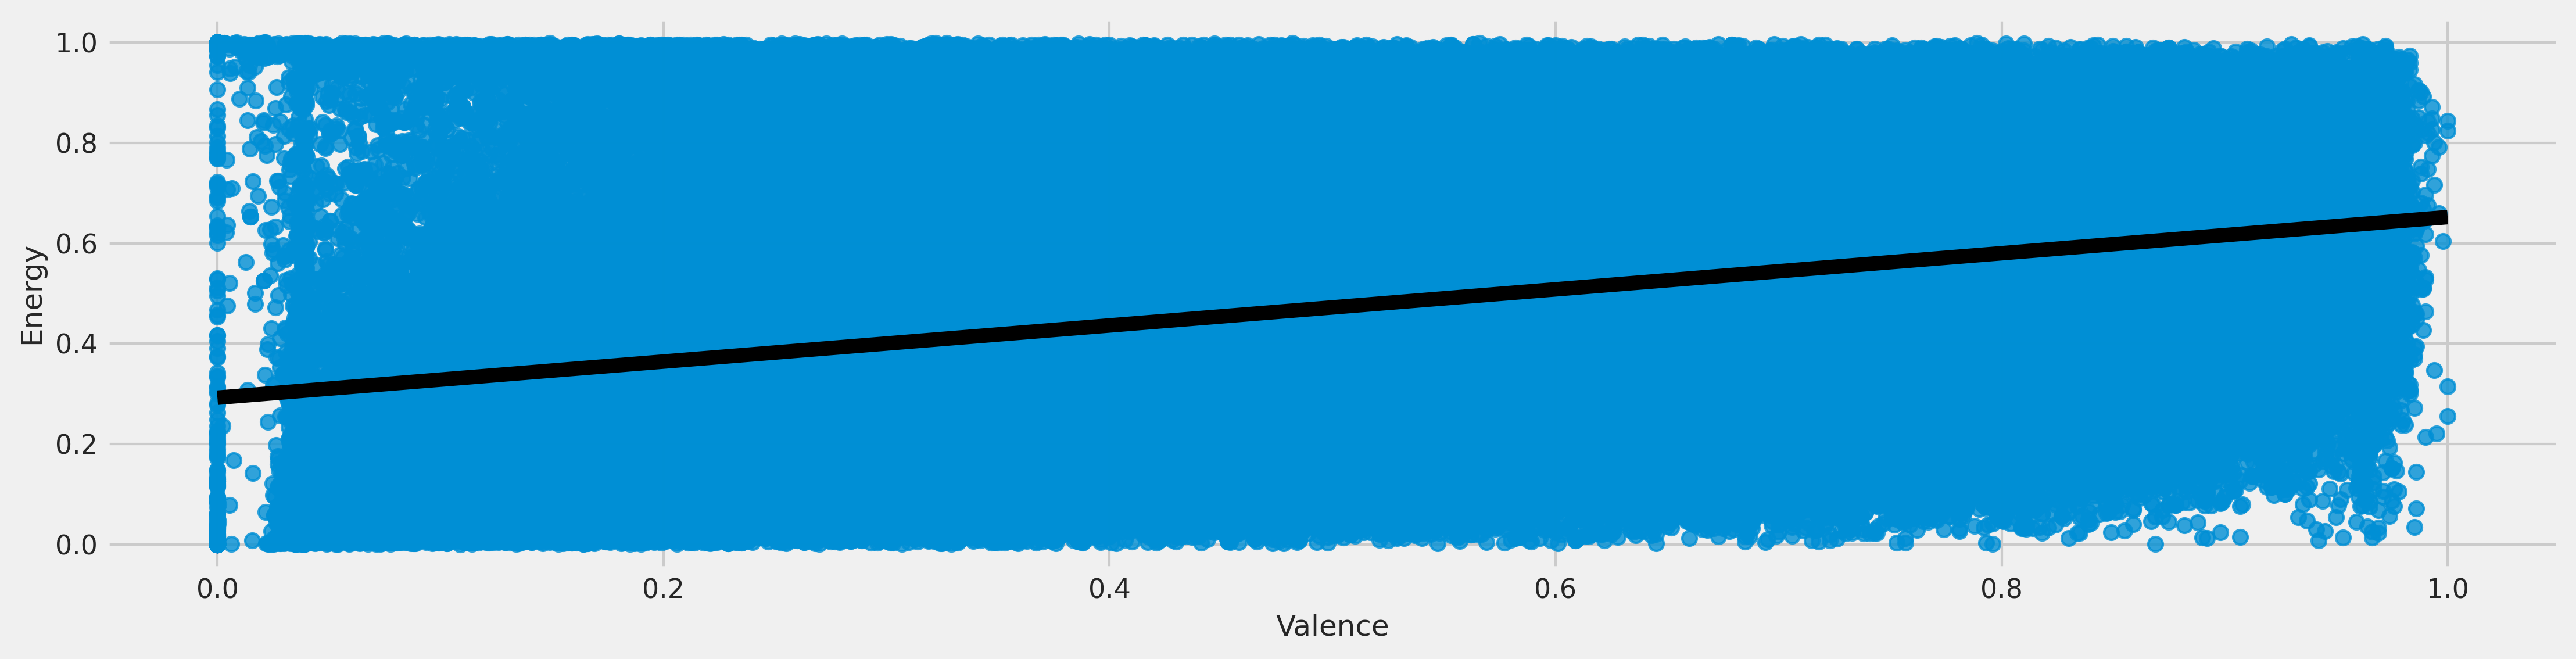

In [27]:
# scatterplot for valence and energy
# sns.relplot(x='valence', y='energy', data=df, kind='scatter', height=3.27, aspect=11.7/3.27)
sns.regplot(x='valence', y='energy', data=df, line_kws = {'color': 'black'})
plt.xlabel('Valence', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.tight_layout()

In [47]:
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances, classification_report
from scipy.spatial.distance import cdist
from collections import defaultdict
import difflib
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import spotipy
from music.oauth2 import SpotifyClientCredentials
from collections import defaultdict

import warnings
warnings.filterwarnings("ignore")

In [32]:
# read in csv
data = pd.read_csv("data.csv")
data = data.drop(columns='year')
print(data.shape)
data.head()

(170653, 18)


valence  acousticness                                            artists  \
0   0.0594         0.982  ['Sergei Rachmaninoff', 'James Levine', 'Berli...   
1   0.9630         0.732                                     ['Dennis Day']   
2   0.0394         0.961  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...   
3   0.1650         0.967                                   ['Frank Parker']   
4   0.2530         0.957                                     ['Phil Regan']   

   danceability  duration_ms  energy  explicit                      id  \
0         0.279       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz   
1         0.819       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8   
2         0.328       500062   0.166         0  1o6I8BglA6ylDMrIELygv1   
3         0.275       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH   
4         0.418       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6   

   instrumentalness  key  liveness  loudness  mode  \
0          0.878000   10     0.665   -20.096     1   
1          0.000000    7     0.160   -12.441     1   
2          0.913000    3     0.101   -14.850     1   
3          0.000028    5     0.381    -9.316     1   
4          0.000002    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [33]:
# standardizing the data
X = data.select_dtypes(np.number)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1             2             3             4   \
count  1.706530e+05  1.706530e+05  1.706530e+05  1.706530e+05  1.706530e+05   
mean  -7.461296e-17 -2.105151e-16 -7.381354e-16  5.862447e-17 -3.810591e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.008534e+00 -1.335303e+00 -3.051005e+00 -1.790706e+00 -1.802346e+00   
25%   -8.039923e-01 -1.064048e+00 -6.948874e-01 -4.846357e-01 -8.495914e-01   
50%    4.336649e-02  3.692581e-02  6.020570e-02 -1.861852e-01 -4.255203e-02   
75%    8.299282e-01  1.039504e+00  7.414927e-01  2.493829e-01  8.242681e-01   
max    1.791281e+00  1.313418e+00  2.558258e+00  4.101357e+01  1.933947e+00   

                 5             6             7             8             9   \
count  1.706530e+05  1.706530e+05  1.706530e+05  1.706530e+05  1.706530e+05   
mean  -3.197698e-17 -5.329497e-17  9.626404e-17 -2.228396e-16  1.305727e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.039555e-01 -5.327705e-01 -1.479295e+00 -1.177539e+00 -8.517487e+00   
25%   -3.039555e-01 -5.327705e-01 -9.103181e-01 -6.123348e-01 -5.523080e-01   
50%   -3.039555e-01 -5.320815e-01 -5.685331e-02 -3.995252e-01  1.558444e-01   
75%   -3.039555e-01 -2.073844e-01  7.966115e-01  3.155608e-01  7.520262e-01   
max    3.289955e+00  2.657289e+00  1.650076e+00  4.543149e+00  2.689222e+00   

                 10            11             12            13  
count  1.706530e+05  1.706530e+05  170653.000000  1.706530e+05  
mean   7.328059e-18 -4.530073e-17       0.000000 -8.060865e-17  
std    1.000003e+00  1.000003e+00       1.000003  1.000003e+00  
min   -1.553007e+00 -1.440072e+00      -0.604606 -3.805520e+00  
25%   -1.553007e+00 -9.360982e-01      -0.390153 -7.633272e-01  
50%    6.439120e-01  7.184853e-02      -0.328090 -6.944636e-02  
75%    6.439120e-01  7.590849e-01      -0.140060  6.081523e-01  
max    6.439120e-01  3.141504e+00       5.355837  4.124123e+00

In [34]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

# inertia on the fitted data
kmeans.inertia_

1959675.2065401222

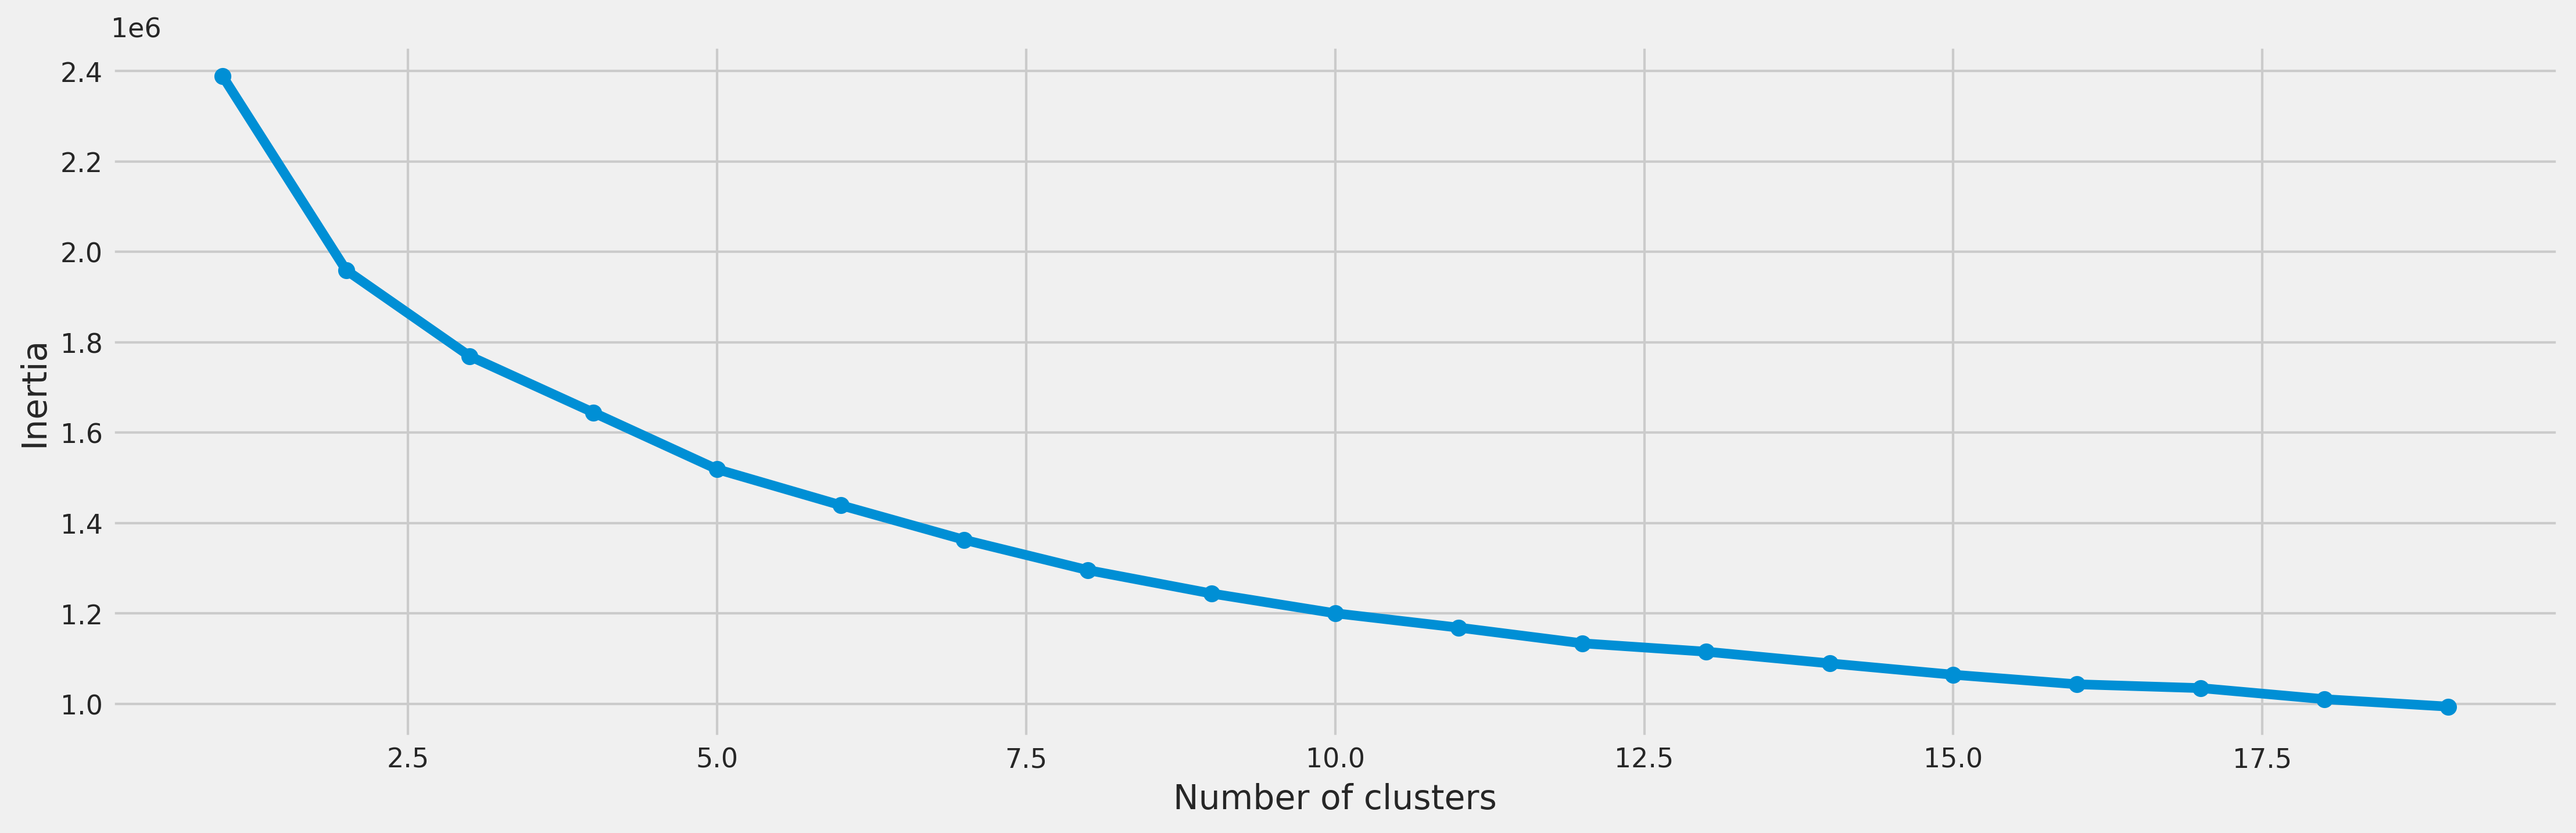

In [36]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.rcParams['figure.dpi'] = 300
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()

In [38]:
# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

# assign pred to a new column in data, cluster_label
data['cluster_label'] = pred

# make a df to show the count for each cluster
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    86650
1    69268
0    14735
Name: cluster, dtype: int64

In [41]:
# read in csv
data = pd.read_csv("data.csv")
data = data.drop(columns=['year', 'popularity', 'duration_ms'])

In [42]:
# spotify id and secret
spotify_client_id = '2e01fb70abfd40ae8b2a5c6d26b14342'
spotify_client_secret = 'c83aaf8534e5452a9db69971fb83a666'

# define a function to find the song in the Spotify database
def find_song(name, artists):
    song_data = defaultdict()
    token = SpotifyClientCredentials(client_id=spotify_client_id, client_secret=spotify_client_secret).get_access_token()
    sp = spotipy.Spotify(token)
    results = sp.search(q= 'track: {} artists: {}'.format(name, artists), limit=1)
    if results['tracks']['items'] == []:
        return None
    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]
    song_data['name'] = [name]
    song_data['artists'] = [artists]
    for key, value in audio_features.items():
        song_data[key] = value
    return pd.DataFrame(song_data)

In [43]:
# make a list of columns to get the mean
number_cols = ['danceability','energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
               'instrumentalness', 'liveness', 'valence', 'tempo']

# get songs from the spotify database with find_song()
def get_song_data(song, spotify_data):
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['artists'] == song['artists'])].iloc[0]
        return song_data
    except IndexError:
        return find_song(song['name'], song['artists'])
        
# get the means for all columns defined above        
def get_mean_vector(song, spotify_data):
    song_vectors = []
    song_data = get_song_data(song, spotify_data)
    if song_data is None:
        print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
    song_vector = song_data[number_cols].values
    song_vectors.append(song_vector)  
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

# apply KMeans algorithm to recommend the songs to the users
def recommend_songs(song, spotify_data, n_songs=11):
    song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=3))])

    X = data.select_dtypes(np.number)
    song_cluster_pipeline.fit(X)
    song_cluster_labels = song_cluster_pipeline.predict(X)
    metadata_cols = ['name', 'artists']
    song_center = get_mean_vector(song, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'euclidean')
    index = list(np.argsort(distances)[:, :n_songs][0])
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[rec_songs['name'] != song['name']]
    return rec_songs[metadata_cols].reset_index(drop=True)

In [51]:
# this function allows users to enter the song's name, artist and number of songs they want to see
def songs_input():
    los = []
    dos = {'name': '', 'artists': ''}
    try:
        sn = input('Please enter the name of a song you\'ve been binge listening to: ')
        sa = input('Please enter the artist(s) of the song: ')
        snum = int(input('How many songs would you like me to recommend? '))
        dos['Wildest Dream'] = sn
        dos['Taylor Swift'] = sa
        return recommend_songs(dos, data, snum+1)
    except ValueError:
        return 'Please try to run the program again'

songs_input()

Please enter the name of a song you've been binge listening to: Wildest Dreams
Please enter the artist(s) of the song: Taylor Swift
How many songs would you like me to recommend? 4


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track:  artists: ', 'limit': 1, 'offset': 0, 'type': 'track', 'market': None} returned 400 due to Only valid bearer authentication supported


SpotifyException: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=track%3A++artists%3A+&limit=1&offset=0&type=track:
 Only valid bearer authentication supported, reason: None